<center style='font-size:40px;font-weight:bold'>House Prices Prediction</center>

# Data Overview:
## Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 100

import seaborn as sns
from util import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Read Data:

In [2]:
!ls

House Prices Predictions.ipynb	__pycache__  util.py


In [4]:
train      = pd.read_csv('../0_Data/train.csv')
test       = pd.read_csv('../0_Data/test.csv')

for data in [train, test]:
    print(f'~> [{var2str(data).ljust(5)}] has {bg(data.shape[0])} rows, and {bg(data.shape[1])} columns.')

~> [train] has  1,460  rows, and  81  columns.
~> [test ] has  1,459  rows, and  80  columns.


## Data Overview:

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

My assumption here, that the organizers gathered all the data together, then they took the first 1,460 rows to be the training data, and the rest to be the testing data, in other words, the data is not shuffled.
<br><br>
Now, let's take an overview of the training data:

In [6]:
summary(train, 'Missing')

~> Dataframe has  1,460  Rows, and  81  Columns.
~> Dataframe has  19  Columns have [Missing] Values.
------------------------------------------------------------
~> There are  35 	 Columns that have [Type] =  int64 
~> There are  3 	 Columns that have [Type] =  float64 
~> There are  43 	 Columns that have [Type] =  object 


Wow! This summary table tells us a lot, here's the information we got:
- We have **19** columns that have missing values.
- There a bunch of columns that have the same number of missing values such as **81** for **5 columns**, **37** for **3 columns**, and **38** for **2 columns**. We'll investigate more on these columns.
- Most of the columns that have a huge number of missing values, are **object** type.
- Initially, we have **43 categorical columns.**
- We have **40 numeric columns.**

Now, let's see the *test* data:

In [10]:
summary(test, 'Missing')

~> Dataframe has  1,459  Rows, and  80  Columns.
~> Dataframe has  33  Columns have [Missing] Values.
------------------------------------------------------------
~> There are  26 	 Columns that have [Type] =  int64 
~> There are  11 	 Columns that have [Type] =  float64 
~> There are  43 	 Columns that have [Type] =  object 


We can see different things here in test data:
- There are **33** columns have missing values, which is larger than the training data.
- The of **int** and **float** columns are different than the training data.
- The number of categorical columns are the same as in the training data.
- Most of the columns that have missing values have the type `object`.

## Descriptive Statistics:
Let's see some descriptive statistics for numeric features and non-numeric features, to make the data more intuitive to use.
<br><br>
But first, let's add the training data and test data together.

In [9]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [14]:
train_ids    = train.Id
train_target = train.SalePrice
test_ids     = test.Id
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

traintest = pd.concat([train, test], axis=0)
traintest.shape

(2919, 80)

In [12]:
traintest.describe(exclude='number').T

count unique      top  freq
Alley           198      2     Grvl   120
BldgType       2919      5     1Fam  2425
BsmtCond       2837      4       TA  2606
BsmtExposure   2837      4       No  1904
BsmtFinType1   2840      6      Unf   851
BsmtFinType2   2839      6      Unf  2493
BsmtQual       2838      4       TA  1283
CentralAir     2919      2        Y  2723
Condition1     2919      9     Norm  2511
Condition2     2919      8     Norm  2889
Electrical     2918      5    SBrkr  2671
ExterCond      2919      5       TA  2538
ExterQual      2919      4       TA  1798
Exterior1st    2918     15  VinylSd  1025
Exterior2nd    2918     16  VinylSd  1014
Fence           571      4    MnPrv   329
FireplaceQu    1499      5       Gd   744
Foundation     2919      6    PConc  1308
Functional     2917      7      Typ  2717
GarageCond     2760      5       TA  2654
GarageFinish   2760      3      Unf  1230
GarageQual     2760      5       TA  2604
GarageType     2762      6   Attchd  1723
Heating        2919      6     GasA  2874
HeatingQC      2919      5       Ex  1493
HouseStyle     2919      8   1Story  1471
KitchenQual    2918      4       TA  1492
LandContour    2919      4      Lvl  2622
LandSlope      2919      3      Gtl  2778
LotConfig      2919      5   Inside  2133
LotShape       2919      4      Reg  1859
MSZoning       2915      5       RL  2265
MasVnrType     2895      4     None  1742
MiscFeature     105      4     Shed    95
Neighborhood   2919     25    NAmes   443
PavedDrive     2919      3        Y  2641
PoolQC           10      3       Ex     4
RoofMatl       2919      8  CompShg  2876
RoofStyle      2919      6    Gable  2310
SaleCondition  2919      6   Normal  2402
SaleType       2918      9       WD  2525
Street         2919      2     Pave  2907
Utilities      2917      2   AllPub  2916

## Checking NaN values:
First let's see the shape of the NaN values in the dataset.

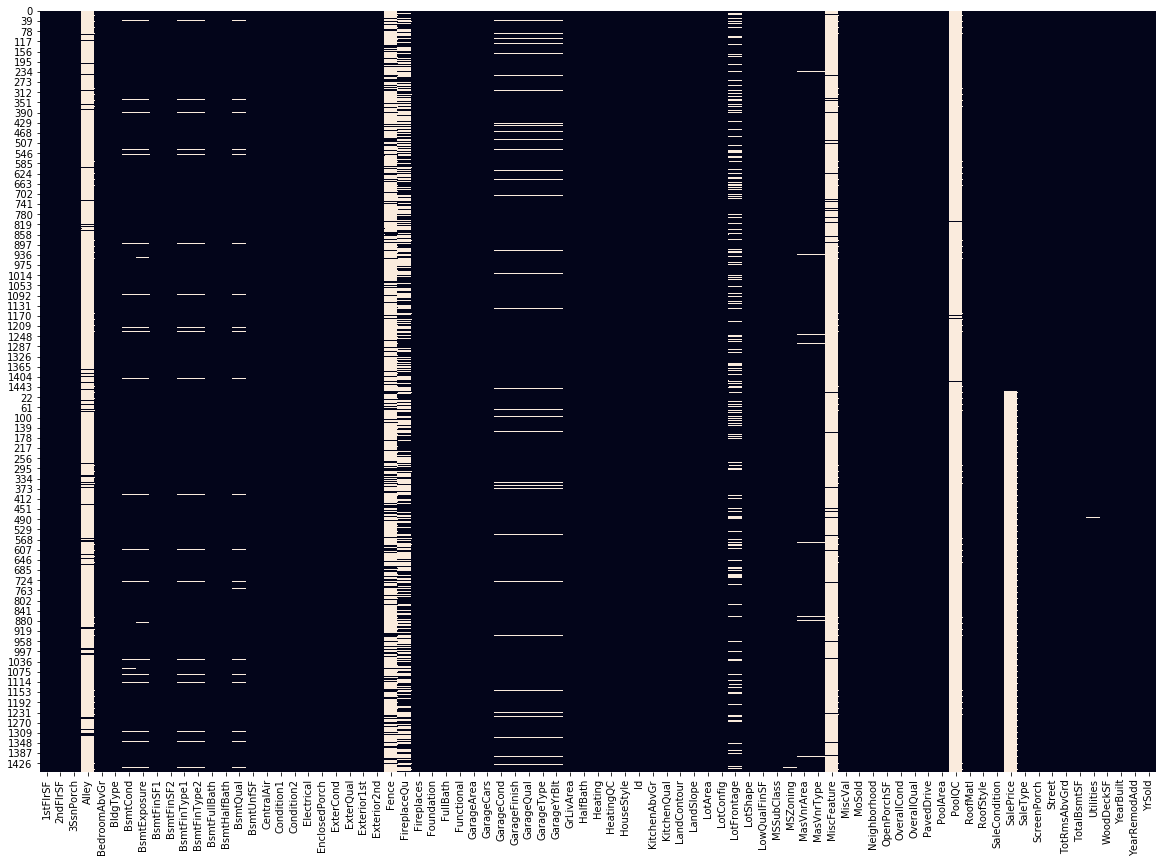

In [13]:
plt.figure(figsize=(20, 14))
sns.heatmap(traintest.isnull(), cbar=False);

We can see some patterns here for NaN values, and we can leverage that for **feature engineering**, for example:
- Creating a column contains a number of missing values for each row.
- Creating a column for each column that has missing values and make the new column has 2 values, `True` for the row of that column has missing value, and `False` if that row has a value.
<br><br>
The meaning of NaN values in the columns:
1. `Alley`: Type of alley access to property.
    - NaN here means that the house has not alley, hence we can set it to 0 after we encode this feature.
2. `BsmtCond`: Evaluates the general condition of the basement.
    - NaN here means there's no basement.
and so on for each feature, we'll do **data investigation**.

In [14]:
# Checking NaN values for each Row.
## Remeber: Number of rows = 2,919
## Remeber: Number of cols = 81
traintest.isna().sum(axis=1).value_counts().head(15)

5     1134
4      771
6      550
3      146
10      92
7       69
11      61
9       36
2       16
8       14
12      10
16       6
15       4
14       4
13       3
dtype: int64

We can see some pattern here, there are 1,134 rows that each row has 5 NaNs, and so on.

In [15]:
# Checking NaN values for each columns.
## Remeber: Number of rows = 2,919
## Remeber: Number of cols = 81
traintest.isna().sum(axis=0).value_counts().head(15)

0       46
1       11
159      4
2        4
82       2
4        1
1420     1
23       1
24       1
157      1
2814     1
486      1
2348     1
1459     1
79       1
dtype: int64

Half of the columns have no missing values. And there some of them have a huge amount of missing values, and we saw that in the heatmap.
<br><br>
Let's see the columns that have nulls:

In [122]:
nan_cols = [col for col in train.columns if train[col].isnull().sum() > 0]
nan_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Checking Constant Columns:

In [16]:
traintest.apply(pd.Series.nunique, axis=0).sort_values(0).head()

Utilities       2
Street          2
Alley           2
CentralAir      2
BsmtHalfBath    3
dtype: int64

Since the minimum number of unique values in the columns is 2, there's no column has constant value.

## Checking Duplicated Columns:

In [17]:
len_dup = traintest.loc[:, traintest.columns.duplicated()].shape[1]
print(f'~> The number of duplicate columns = {bg(len_dup, color="red")}')

~> The number of duplicate columns =  0 


# Data Investigation & EDA:
## Big Picture:

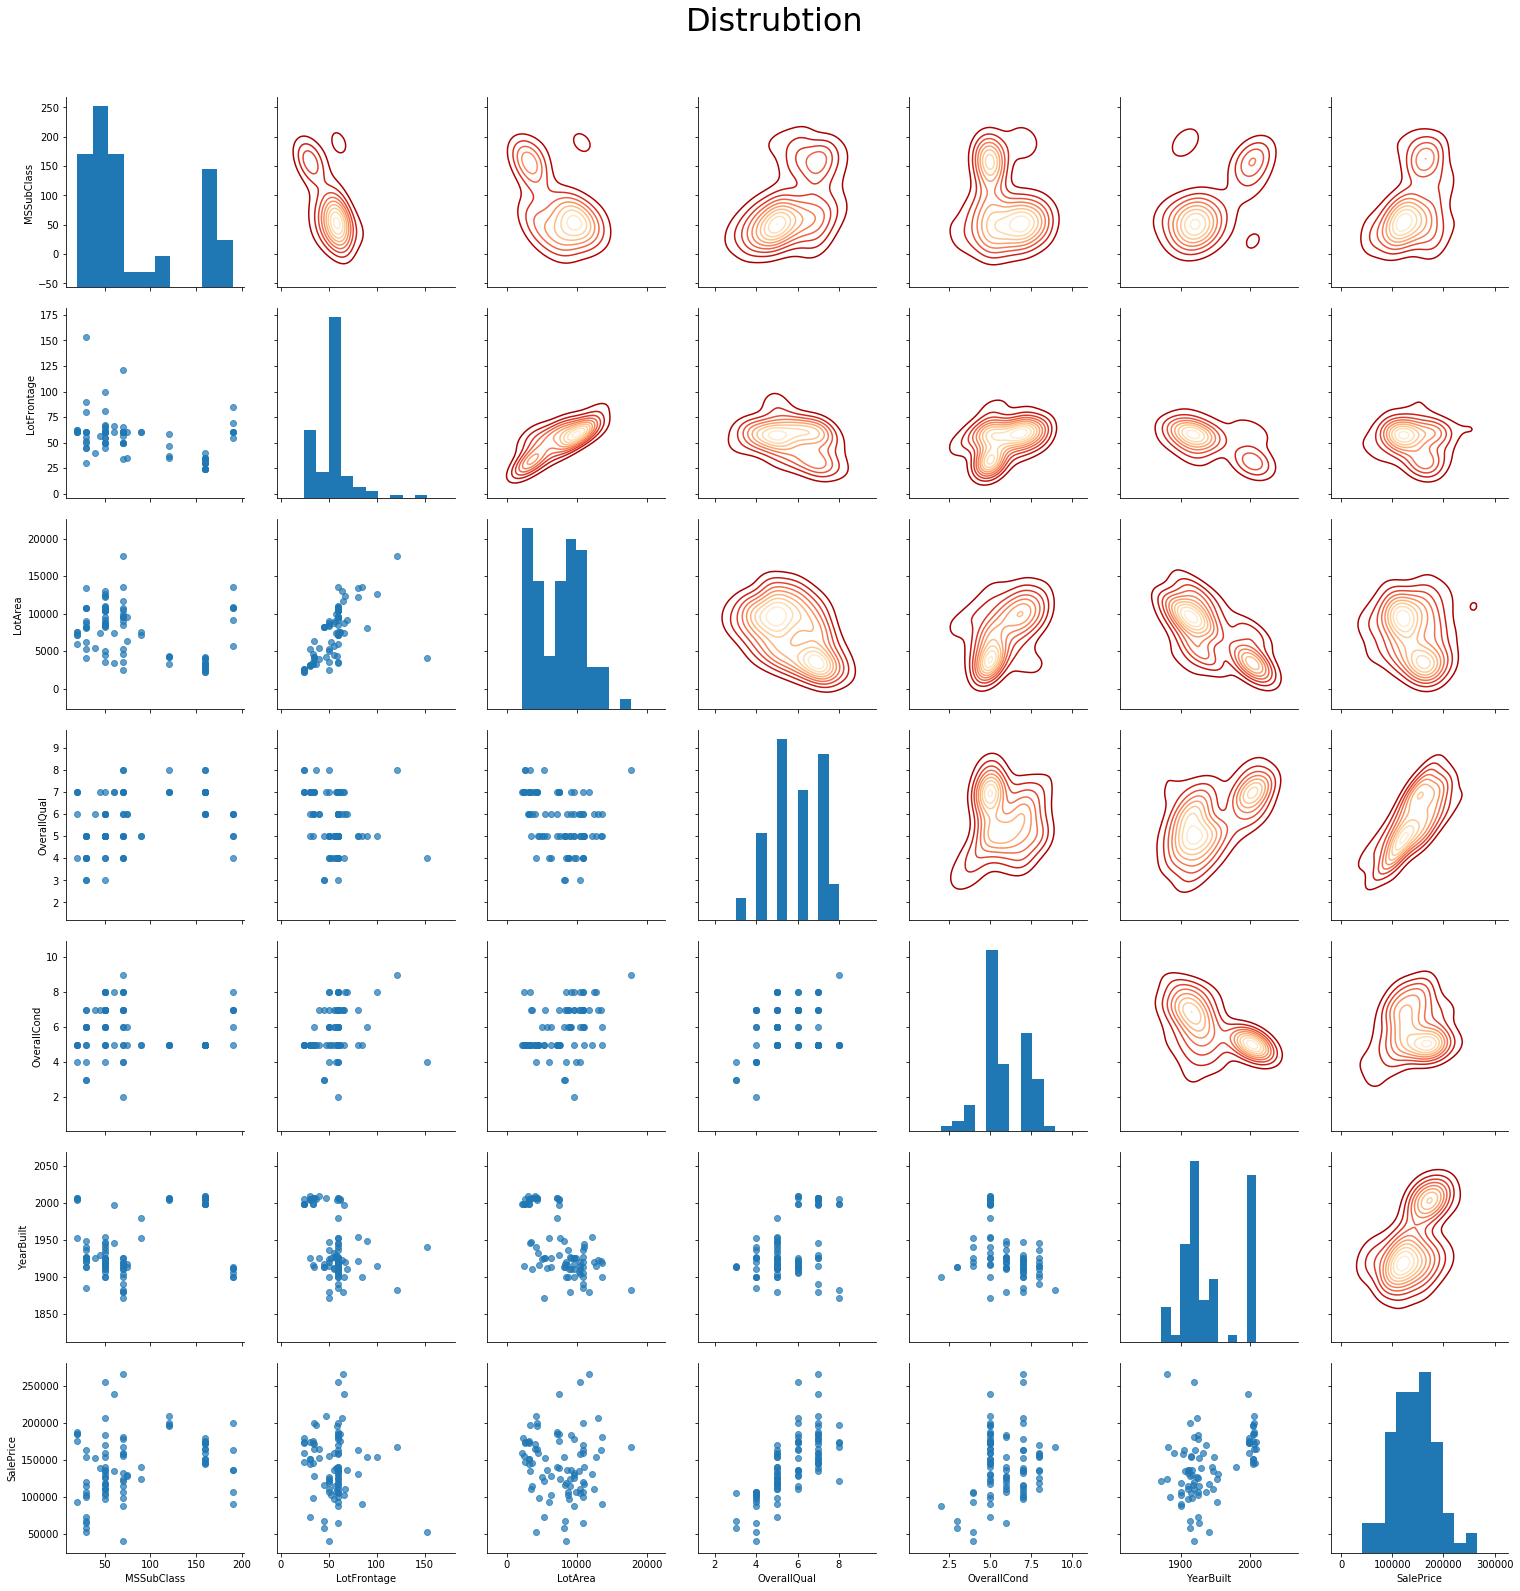

In [45]:
to_visual = train[list(train.columns[1:20])+['SalePrice']].dropna()

grid = sns.PairGrid(data=to_visual, size=3, diag_sharey=False)
grid.map_lower(plt.scatter, alpha=.7)
grid.map_diag(plt.hist)
grid.map_upper(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.suptitle('Distrubtion', size=32, y=1.05);

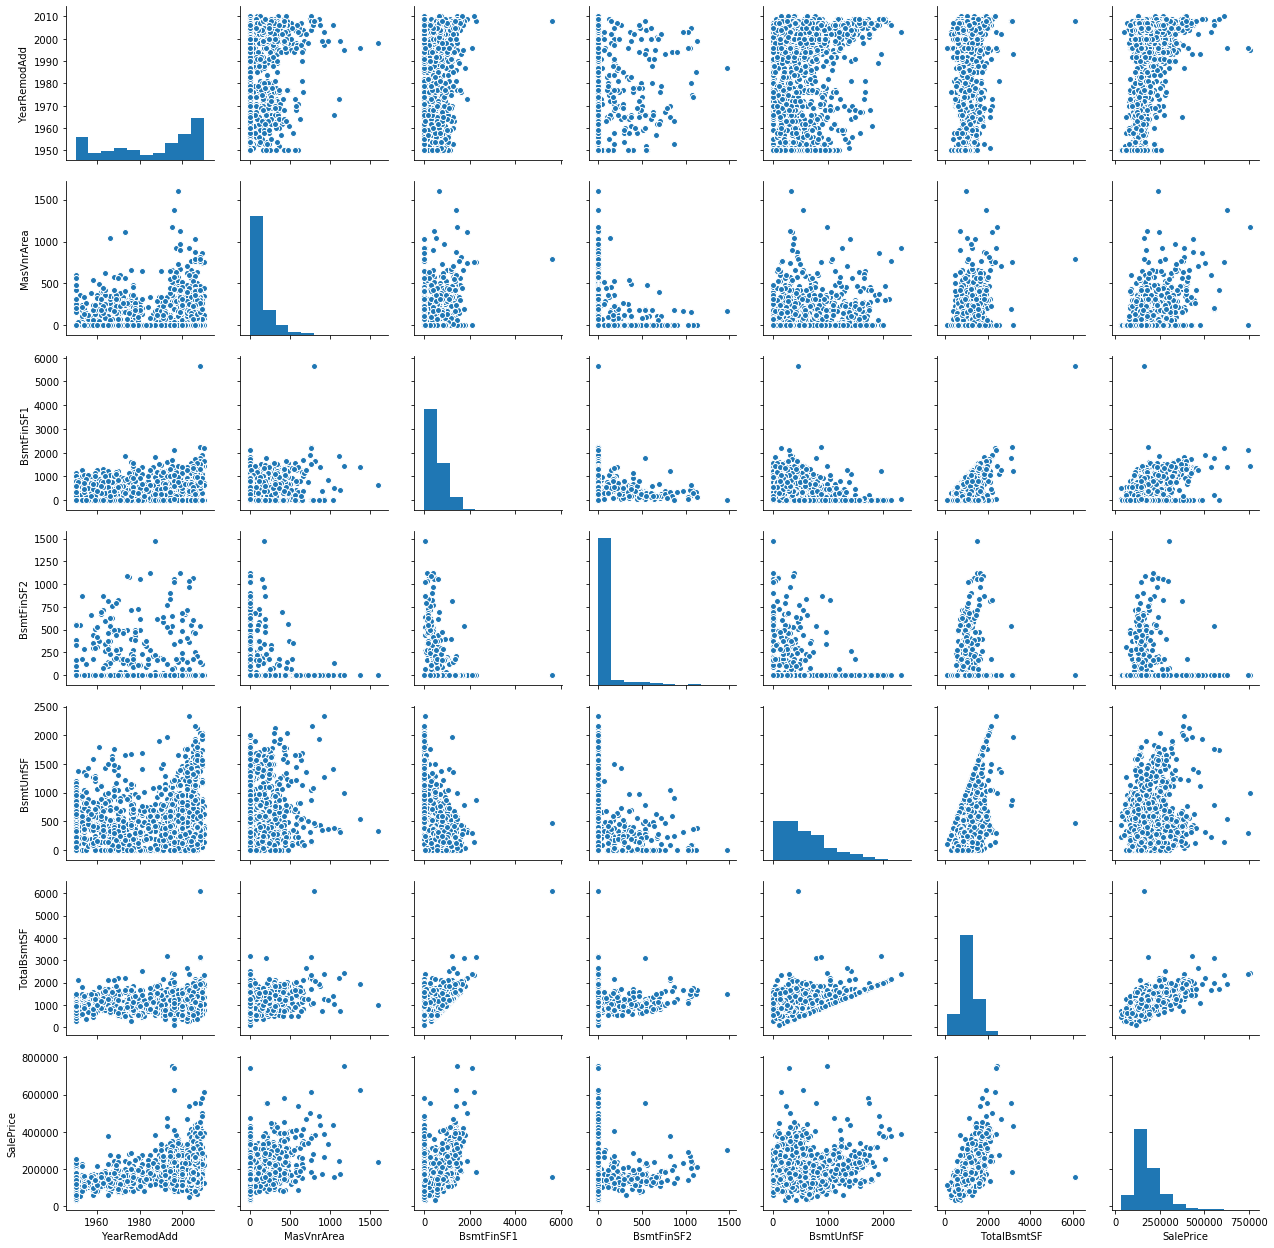

In [47]:
to_visual = train[list(train.columns[20:40])+['SalePrice']].dropna()

sns.pairplot(to_visual);

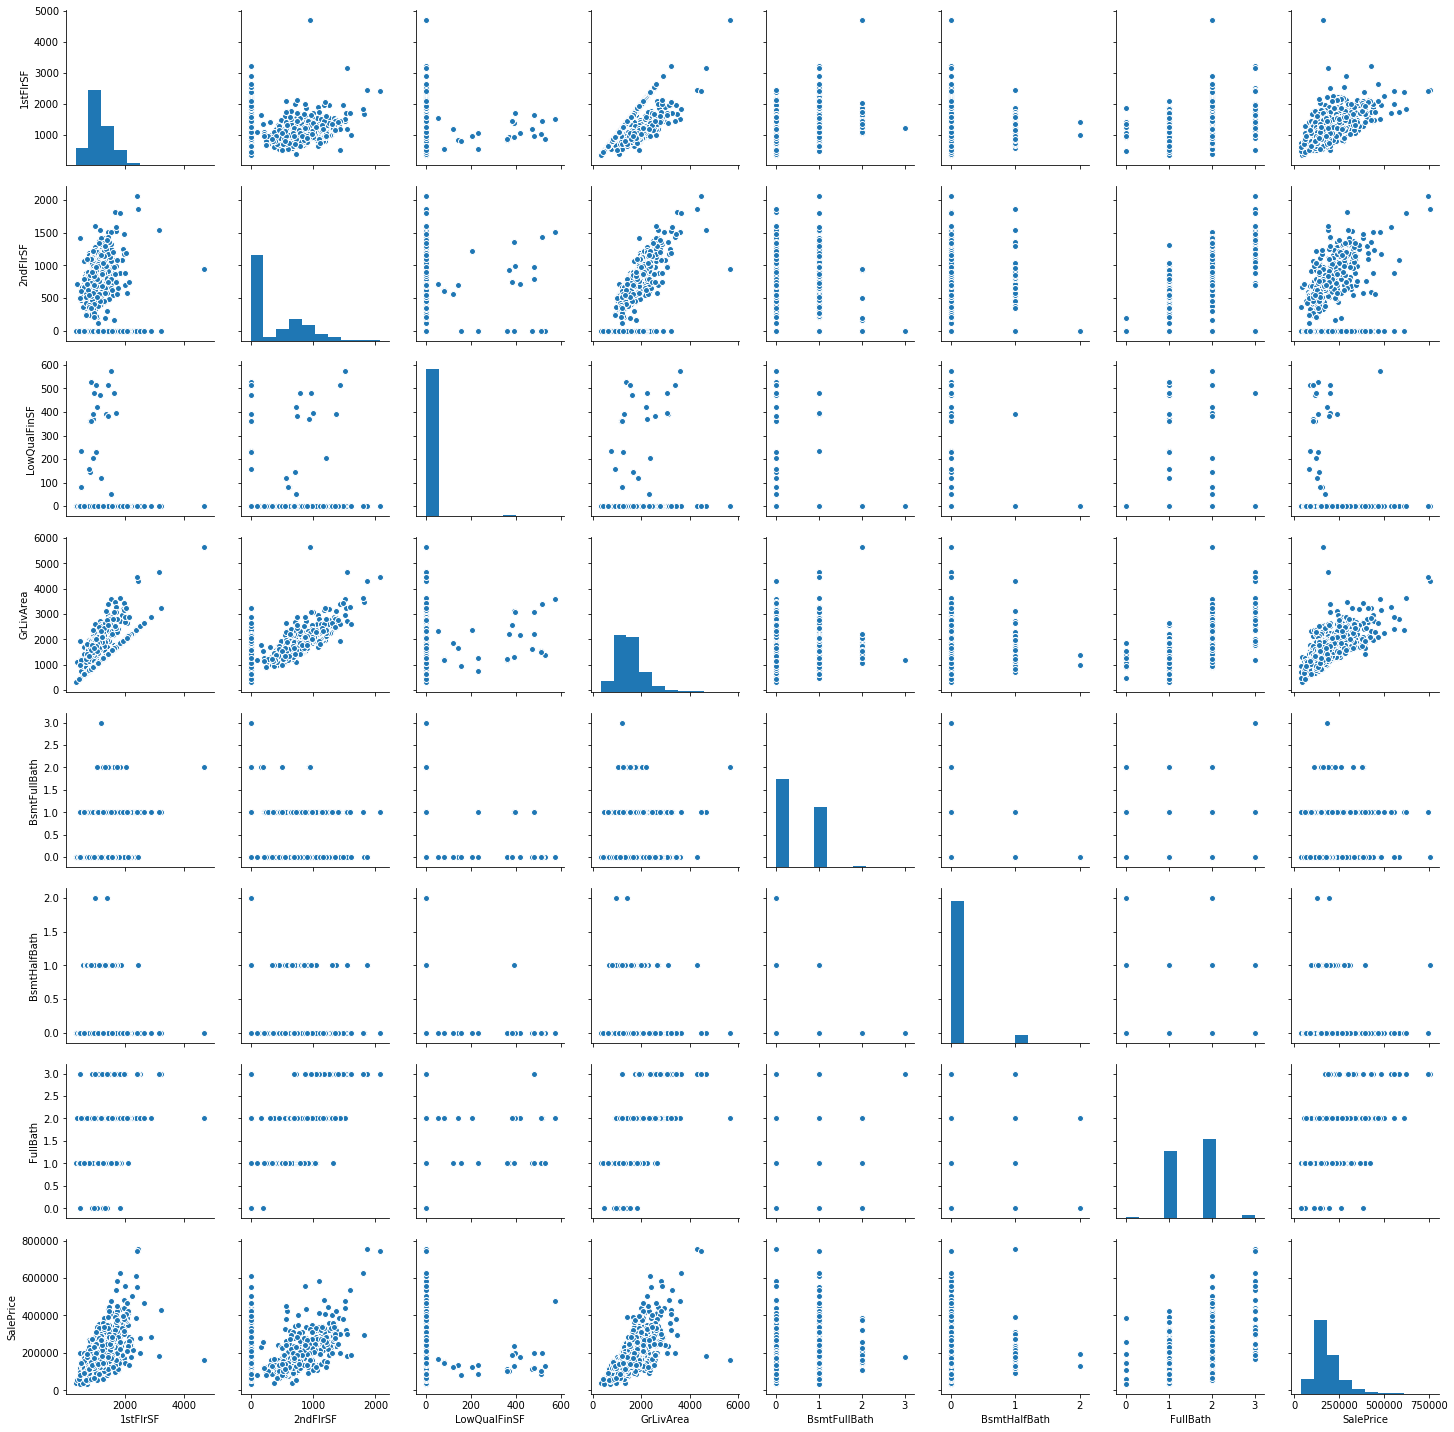

In [3]:
to_visual = train[list(train.columns[40:50])+['SalePrice']].dropna()

sns.pairplot(to_visual);

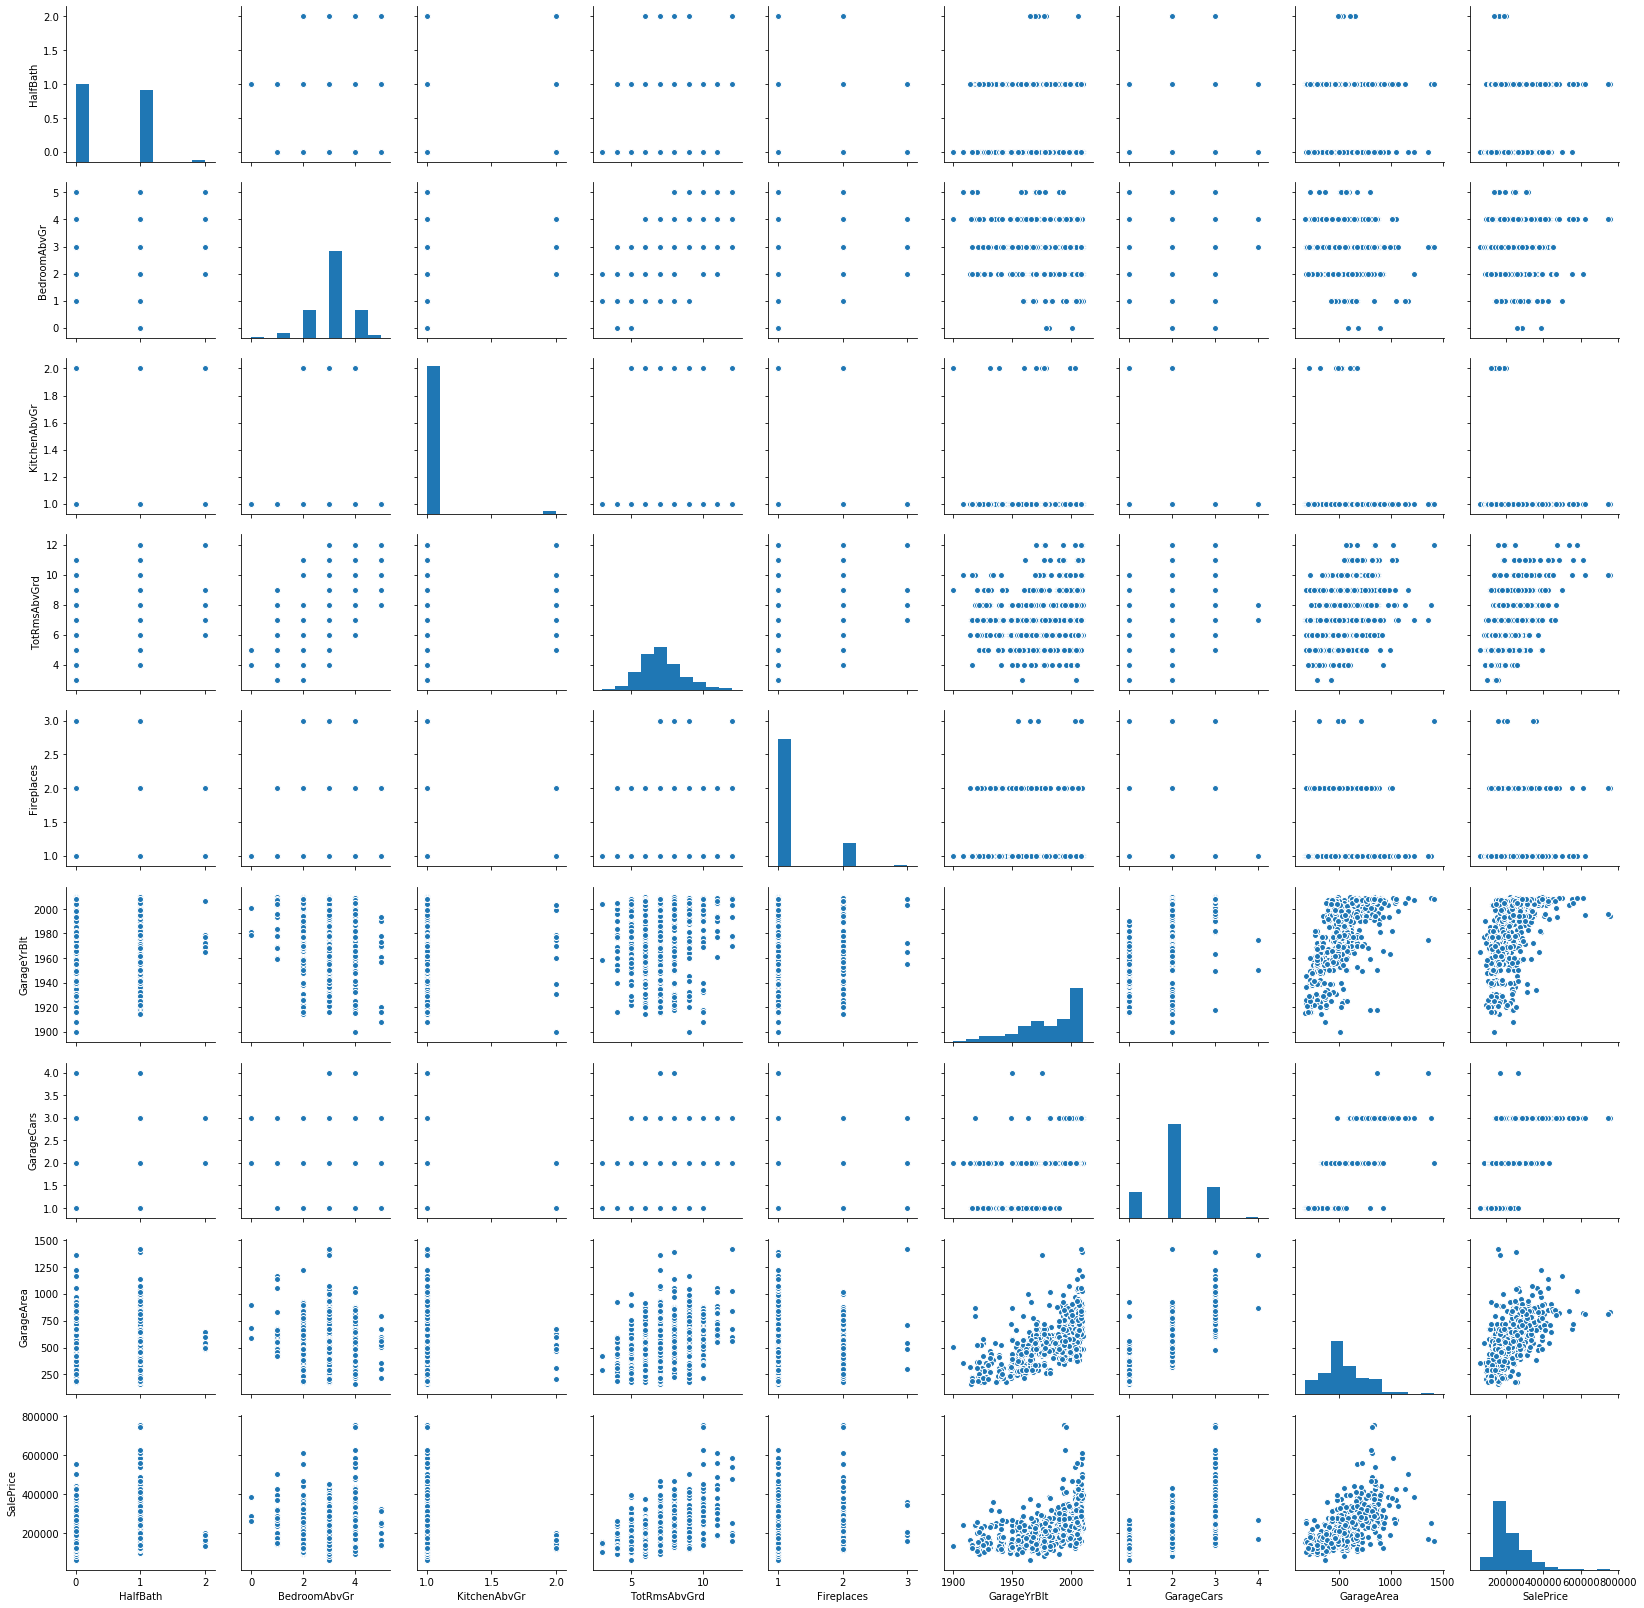

In [6]:
to_visual = train[list(train.columns[50:65])+['SalePrice']].dropna()

sns.pairplot(to_visual);

ValueError: x must have 2 or fewer dimensions

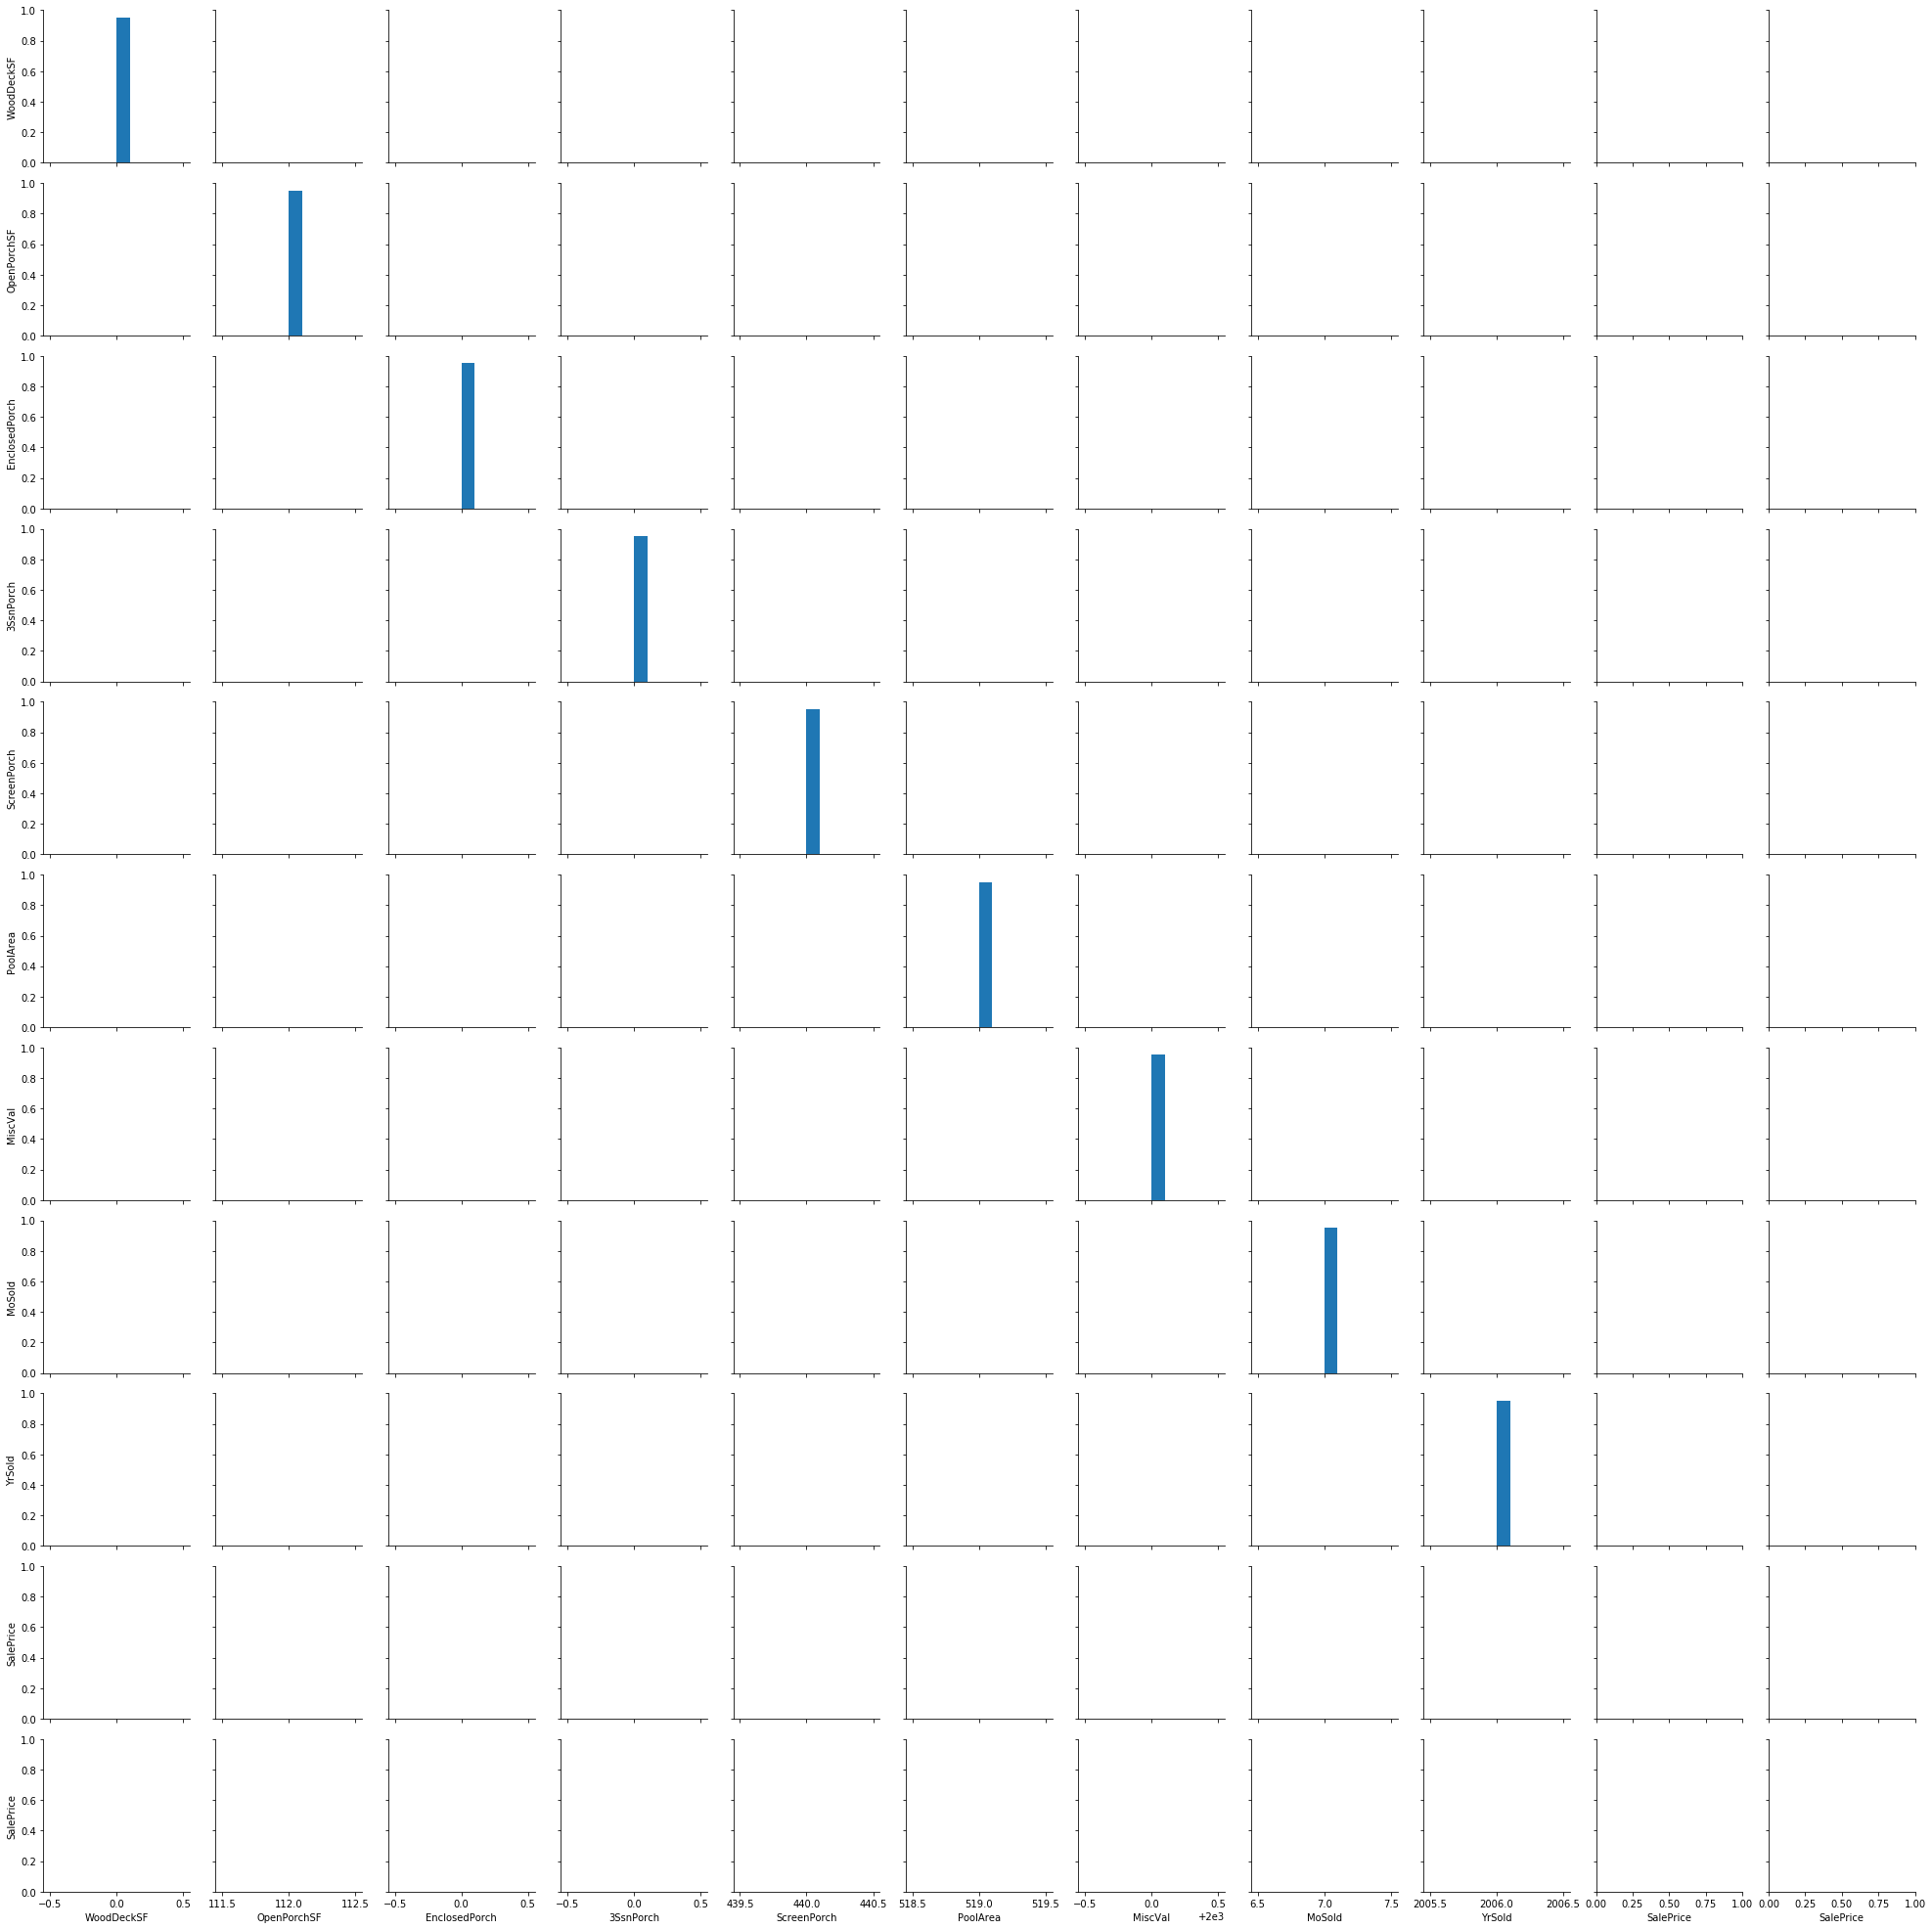

In [10]:
to_visual = train[list(train.columns[65:])+['SalePrice']].dropna()

sns.pairplot(to_visual);

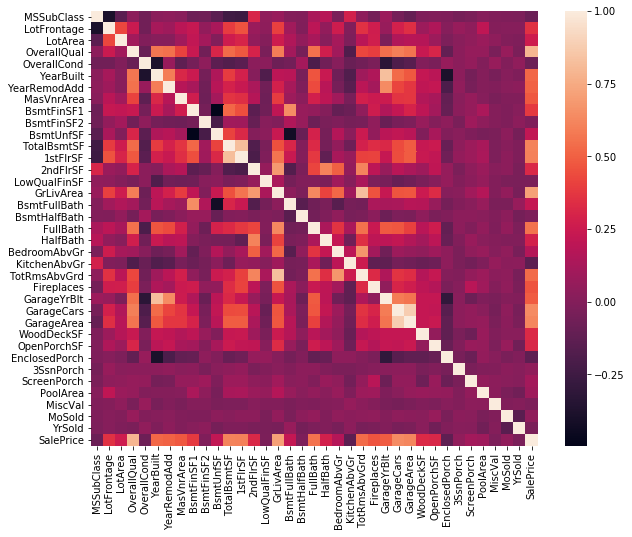

In [40]:
figsize(16, 8)
to_visual = train[list(train.columns[1:])]
sns.heatmap(to_visual.corr());

**Observations:**
- There are a lot of outliers in a lot of columns, we'll try to detect them.
- There are some columns have high correlation with the target column.

## SalePrice:

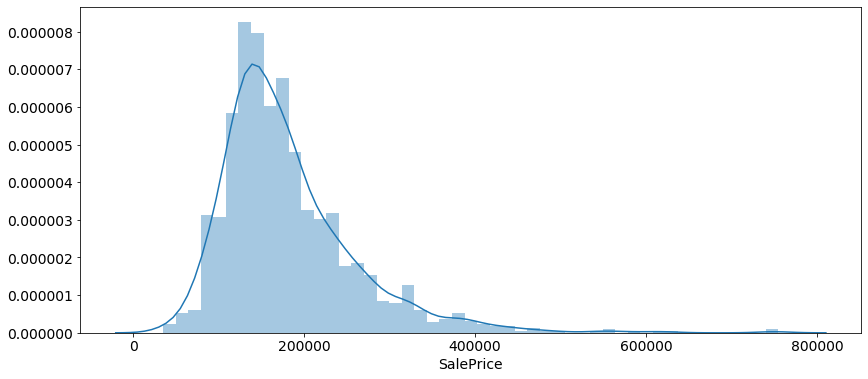

In [44]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(14, 6))
sns.distplot(train.SalePrice);

In [47]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## MSSubClass:

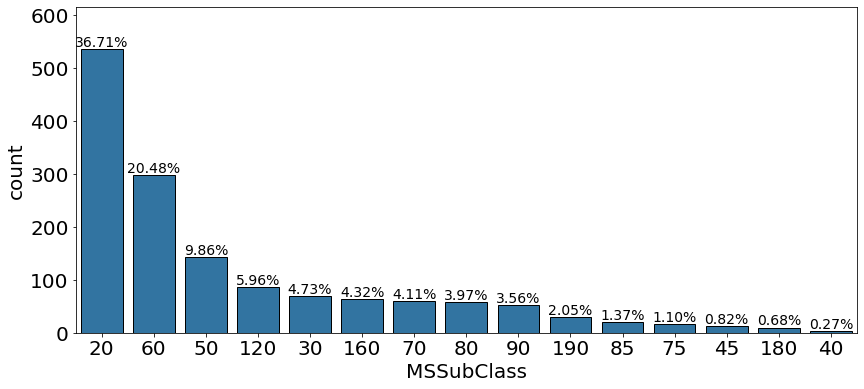

In [51]:
plt.figure(figsize=(14, 6))
color = sns.color_palette()[0]
order = train['MSSubClass'].value_counts().index
ax = sns.countplot(x='MSSubClass', 
              data=train, 
              color=color, 
              order=order,
              edgecolor='k')
show_annotation(ax, total=len(train));

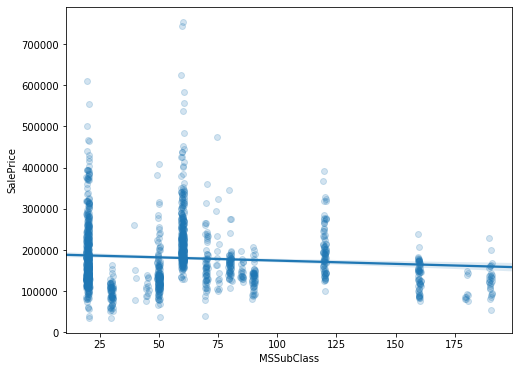

In [25]:
plt.figure(figsize=(8, 6))
sns.regplot(data=train, x='MSSubClass', y='SalePrice', x_jitter=.7, y_jitter=.2,
           scatter_kws={'alpha': 1/5});

## MSZoning:

In [3]:
def plot_cat_with_target(var, rotate=False):
    figsize(16, 6)
    plt.rcParams['font.size'] = 12

    target = 'SalePrice'

    plt.subplot(131)
    ax = train[var].value_counts().plot.bar(edgecolor='k')
    show_annotation(ax, 20, len(train))
    plt.title(f'Distrubtion of {var}', size=16, y=1.05)

    plt.subplot(132)
    sns.boxplot(data=train, x=var, y=target)
    plt.title(f'Relation b/w {var} & SalePrice', size=16, y=1.05);
    plt.xticks(rotation=(90 if rotate else 0))

    plt.subplot(133)
    sns.swarmplot(data=train, x=var, y=target, color='black', size=3)
    plt.title(f'Relation b/w {var} & SalePrice', size=16, y=1.05)
    plt.xticks(rotation=(90 if rotate else 0));

    plt.subplots_adjust(wspace=.4)

In [4]:
def figsize(sz1=8, sz2=6):
    return plt.figure(figsize=(sz1, sz2))

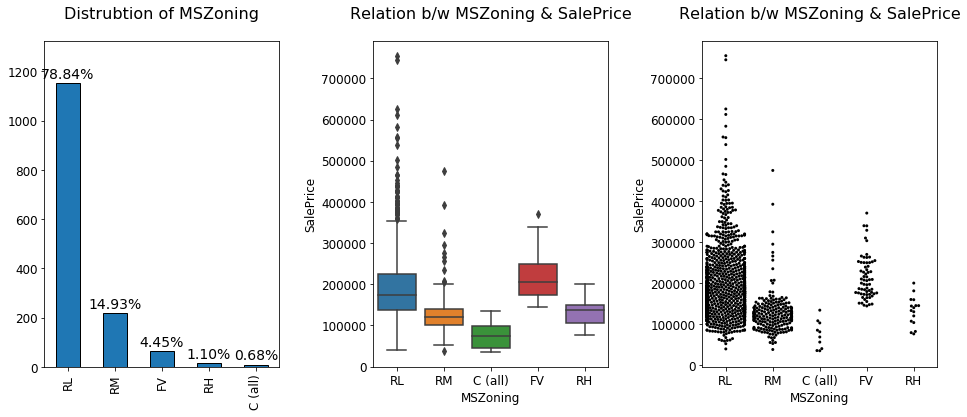

In [103]:
plot_cat_with_target('MSZoning')

## LotFrontage:

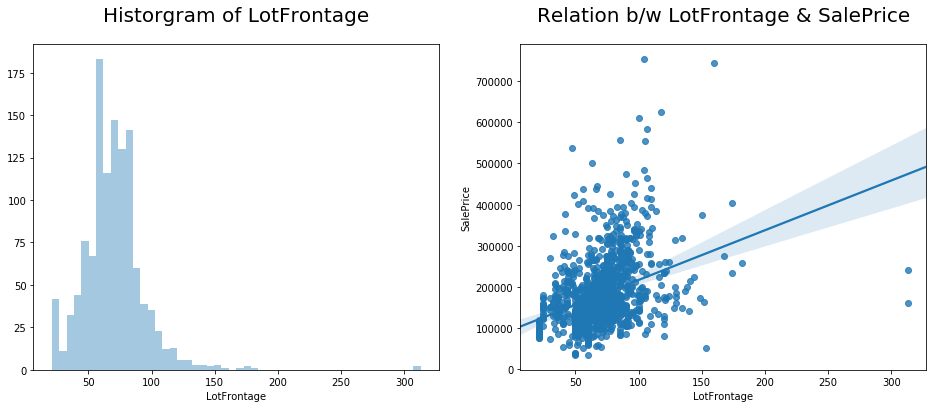

In [32]:
figsize(16, 6)

plt.subplot(121)
sns.distplot(train['LotFrontage'].dropna(), kde=False);
plt.title('Historgram of LotFrontage', size=20, y=1.05)

plt.subplot(122)
sns.regplot(data=train, x='LotFrontage', y='SalePrice')
plt.title('Relation b/w LotFrontage & SalePrice', size=20, y=1.05);

# plt.subplots_adjust(wspace=.2);

**NOTE:** <br>
We can see there are 2 points that are greater than 300 feet for the `LotFrontage`considered as outliers, because there's an increasing relation b/w `LotFrontage` and `SalePrice`.

## Street:

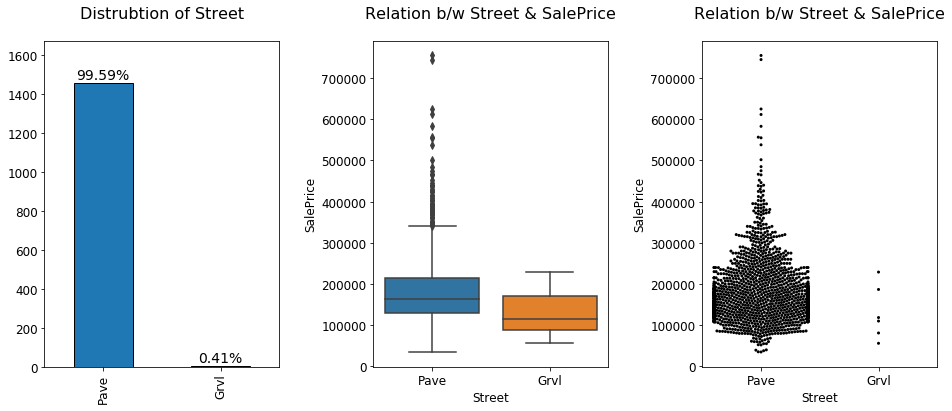

In [74]:
plot_cat_with_target('Street')

## Alley:

In [5]:
train.Alley.fillna('NaN', inplace=True)

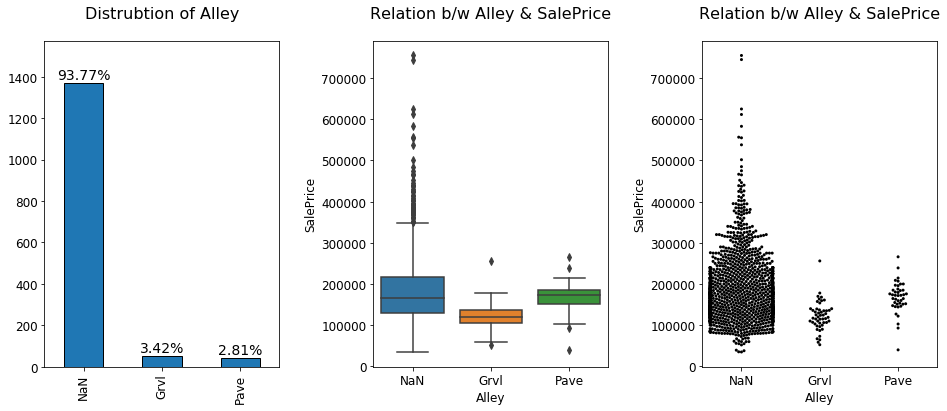

In [6]:
plot_cat_with_target('Alley')

There is a lot of houses that don't have alley to the house.
<br><br>
What I can infer is that, this feature does't tell us much about the price of the house.

## LotShape:

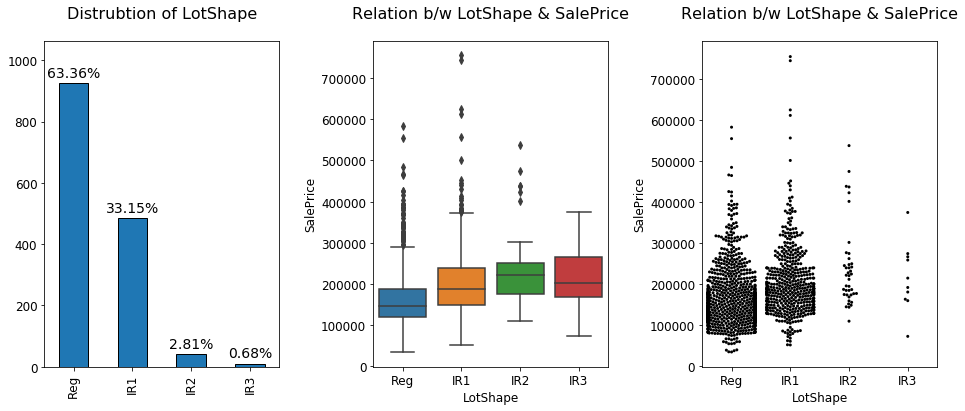

In [70]:
plot_cat_with_target('LotShape')

## LandContour: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Flatness of the property**

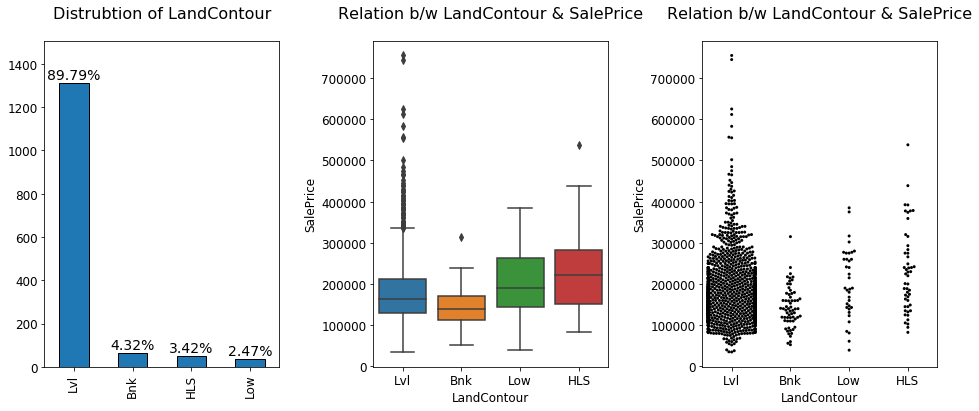

In [71]:
plot_cat_with_target('LandContour')

## Utilities:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Type of utilities available**

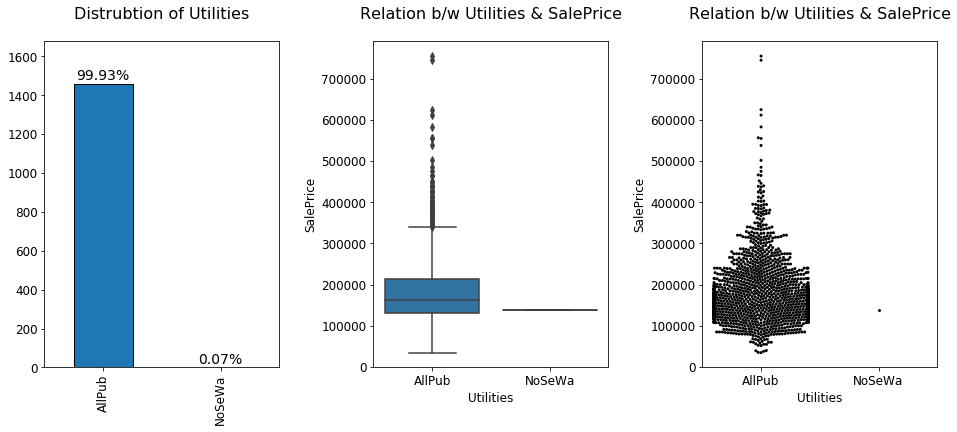

In [72]:
plot_cat_with_target('Utilities')

**Obervation:**<br>We can see here, that `Utilities` features, have only one point that's different than `AllPub`, IMHO, we should **remove** this feature.

## LotConfig:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Lot Configuration**

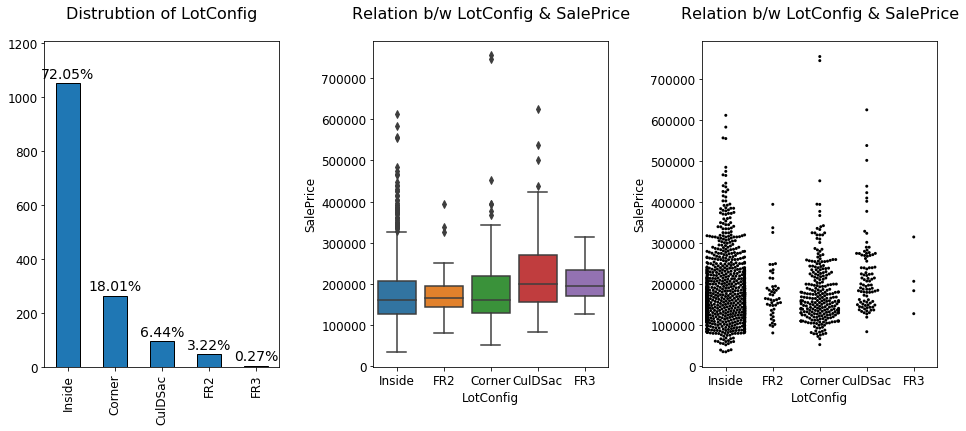

In [73]:
plot_cat_with_target('LotConfig')

## LandSlope:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Slope of property**

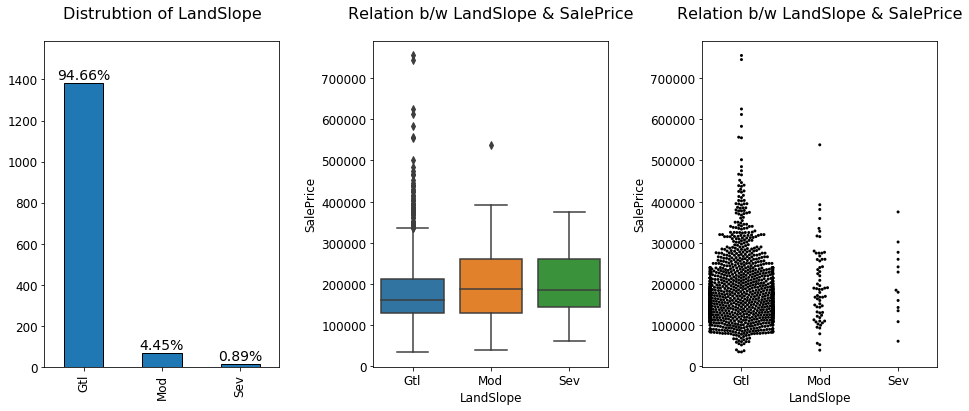

In [75]:
plot_cat_with_target('LandSlope')

## Neighborhood: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Physical locations within Ames city limits**

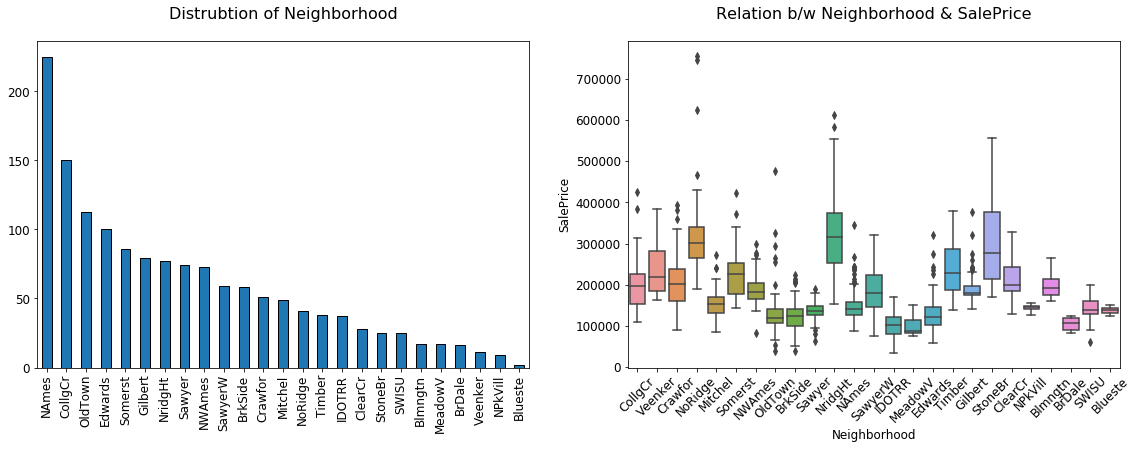

In [83]:
figsize(30, 6)
plt.rcParams['font.size'] = 12

var    = 'Neighborhood'
target = 'SalePrice'

plt.subplot(131)
ax = train[var].value_counts().plot.bar(edgecolor='k')
# show_annotation(ax, 20, len(train))
plt.title(f'Distrubtion of {var}', size=16, y=1.05)

plt.subplot(132)
sns.boxplot(data=train, x=var, y=target)
plt.xticks(rotation=45)
# sns.swarmplot(data=train, x=var, y=target, color='black', size=3)
plt.title(f'Relation b/w {var} & SalePrice', size=16, y=1.05);

plt.subplots_adjust(wspace=.2)

**Observation:**<br>
I can see the box plot follows a kind of **sin wave** patter, this might help in the feature engineering.

## Condition1: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Proximity to various conditions**

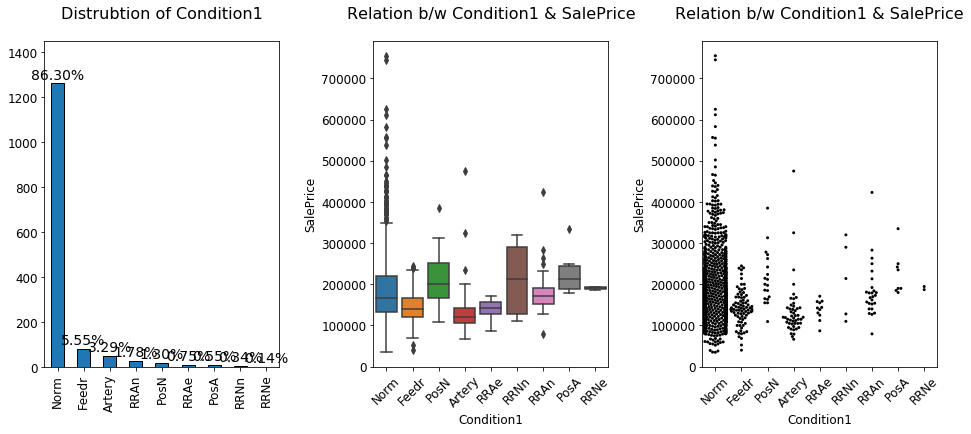

In [86]:
plot_cat_with_target('Condition1', rotate=True)

## Condition2: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Proximity to various conditions (if more than one is present)**

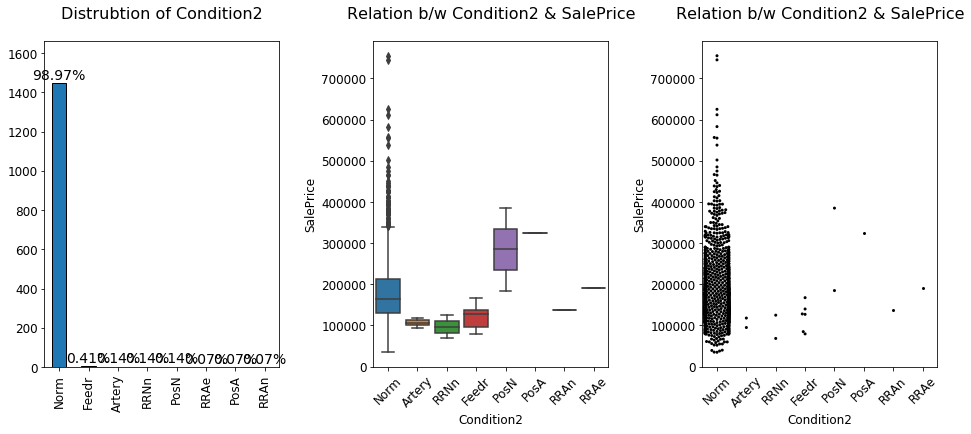

In [88]:
plot_cat_with_target('Condition2', rotate=True)

## BldgType: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Type of dwelling**

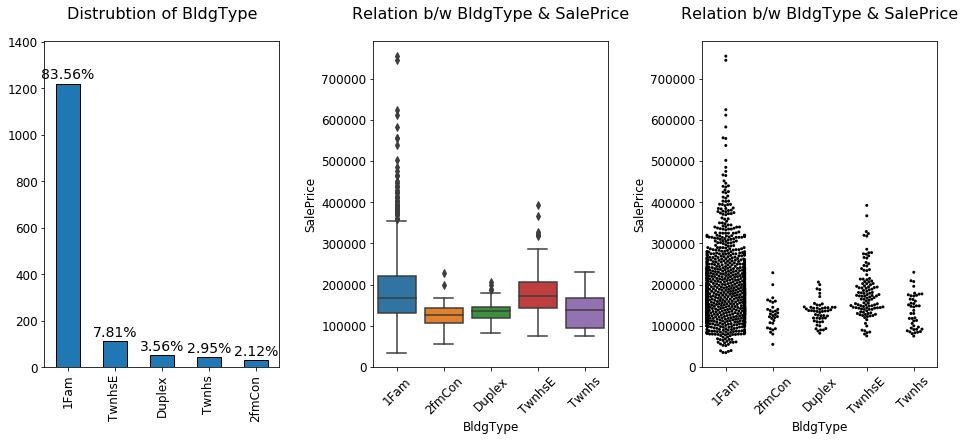

In [89]:
plot_cat_with_target('BldgType', rotate=True)

**Observation:**<br>
You can see, there 2 points, that we can call them outliers, since they have a price larger enough than the normal.

<br><br>
**Interesting Observation:**<br>
You can see from these plots and all the above plots, the same 2 points appears in the swarmp plot, this is quite interesting, we wouldn't get this observation, from watching a few plots.
<br>
Hence, we should remove them.

## HouseStyle: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Style of dwelling**

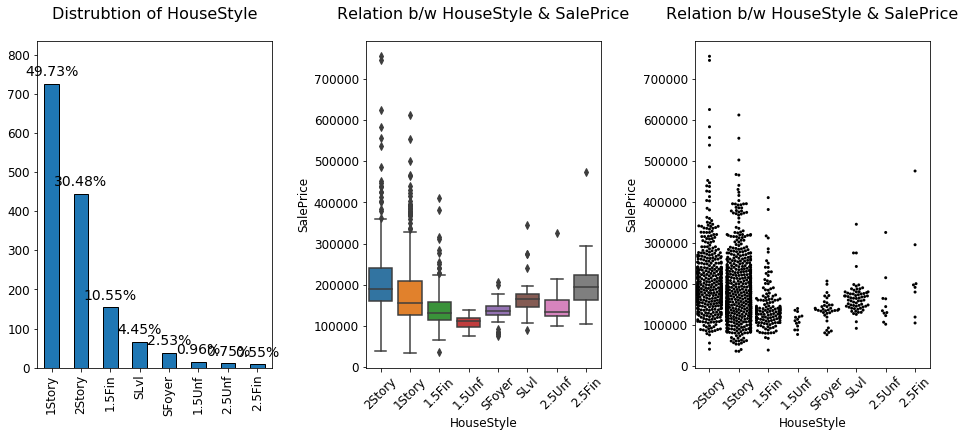

In [91]:
plot_cat_with_target('HouseStyle', rotate=True)

## OverallQual: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Rates the overall material and finish of the house**

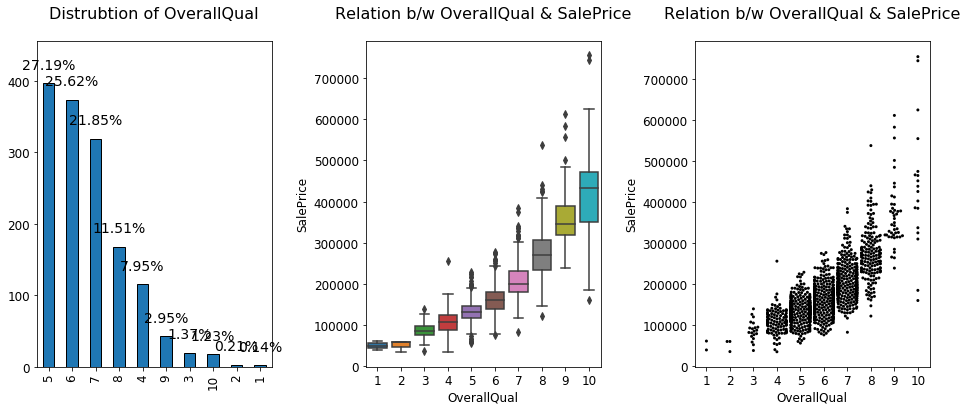

In [92]:
plot_cat_with_target('OverallQual')

**Observation:**<br>
In the box plot, we see an exponential raising.<br>
When the material is very excellent, the price increases, that's very resonable.

## OverallCond: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Rates the overall condition of the house**


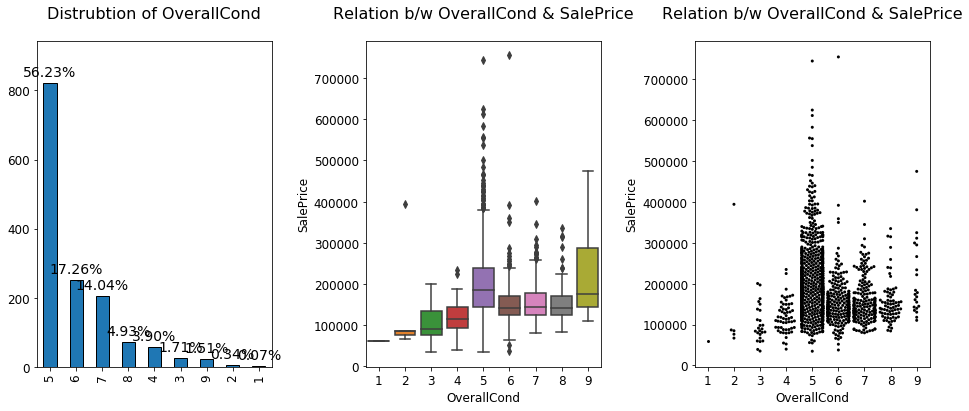

In [93]:
plot_cat_with_target('OverallCond')

**Observation:**<br>
We see the condition of the house, doesn't increase well when the condition is good, unlike the condition of the material of the house.

## YearBuilt & YearRemodAdd: 
Since these 2 features are timedate, we can use them very well in the feature engineering.

<Figure size 1152x432 with 0 Axes>

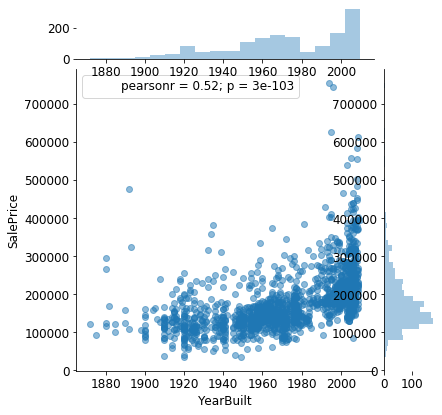

In [124]:
figsize(16, 6);
sns.jointplot(data=train, x='YearBuilt', y='SalePrice', joint_kws={'alpha': .5});

We can see a linear relationship b/w `YearBuilt` and `SalePrice`.<br>
And the pearson correlation is 0.5.

<Figure size 1440x432 with 0 Axes>

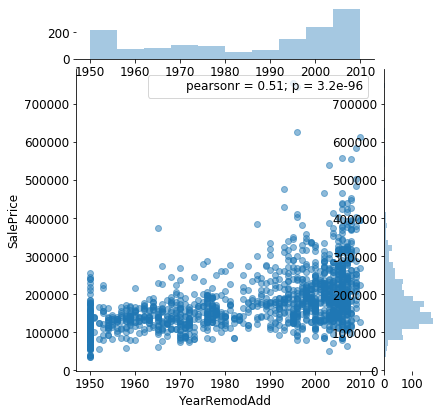

In [102]:
figsize(20, 6)
sns.jointplot(data=train, x='YearRemodAdd', y='SalePrice', joint_kws={'alpha': .5});

## RoofStyle: Type of roof


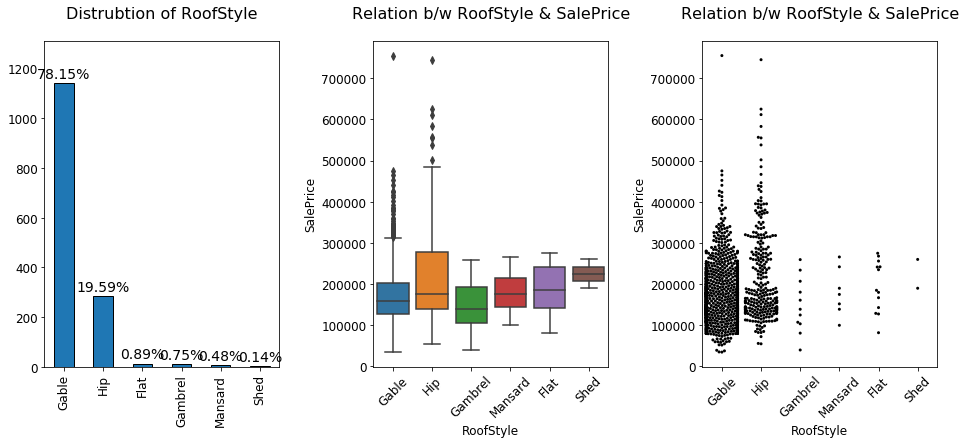

In [126]:
plot_cat_with_target('RoofStyle', rotate=True)

**Observation:**
Looks like the `RoofStyle` is not a good parameter to estimate the price of the house, since all the values of the `RoofStyle` are intertwined.

## RoofMatl: Roof material

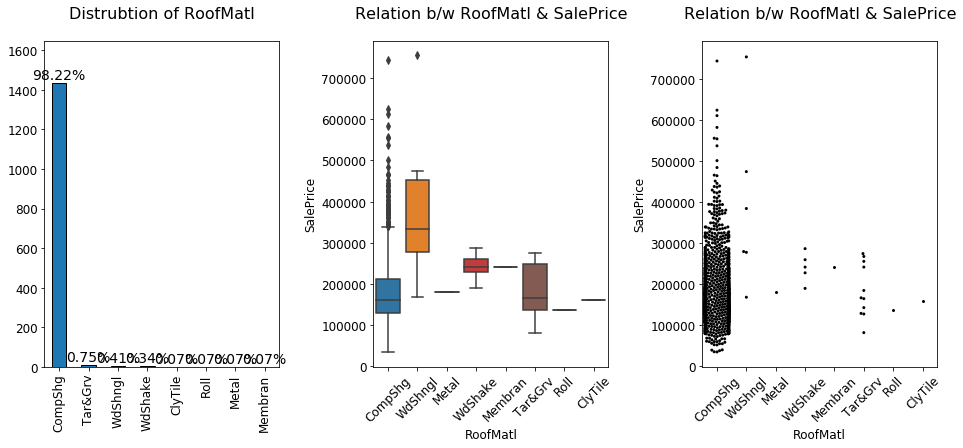

In [128]:
plot_cat_with_target('RoofMatl', rotate=True)

**Observation:**
Looks like the `RoofMatl` tells us something about the sale price, we should consider that.

## Exterior1st: Exterior covering on house

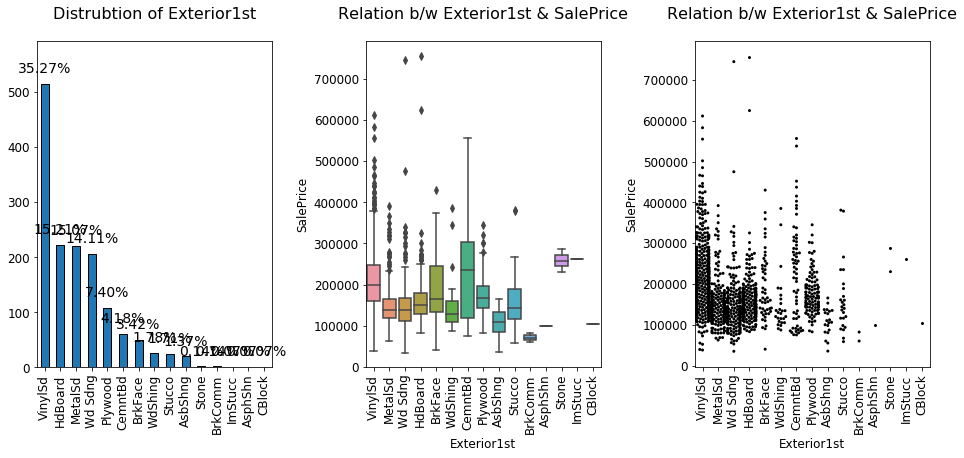

In [136]:
plot_cat_with_target('Exterior1st', rotate=True)

## Exterior2nd: Exterior covering on house (if more than one material)

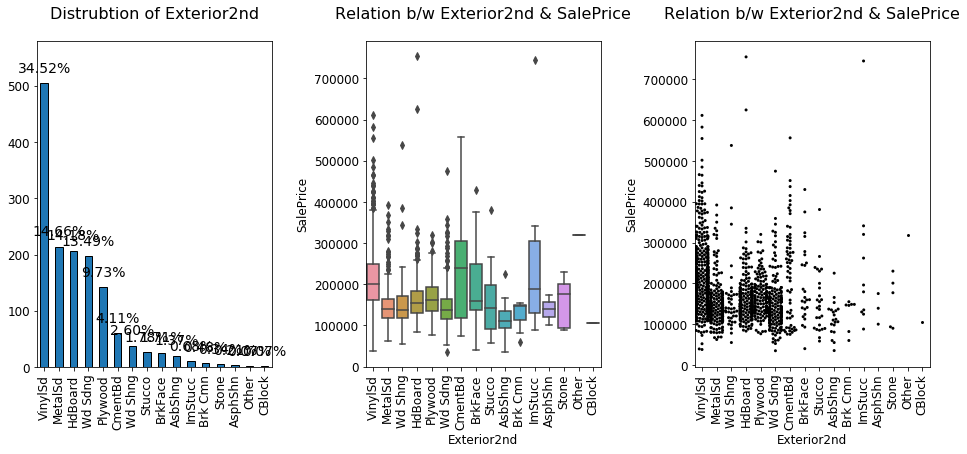

In [138]:
plot_cat_with_target('Exterior2nd', rotate=True)

## MasVnrType: Masonry veneer type

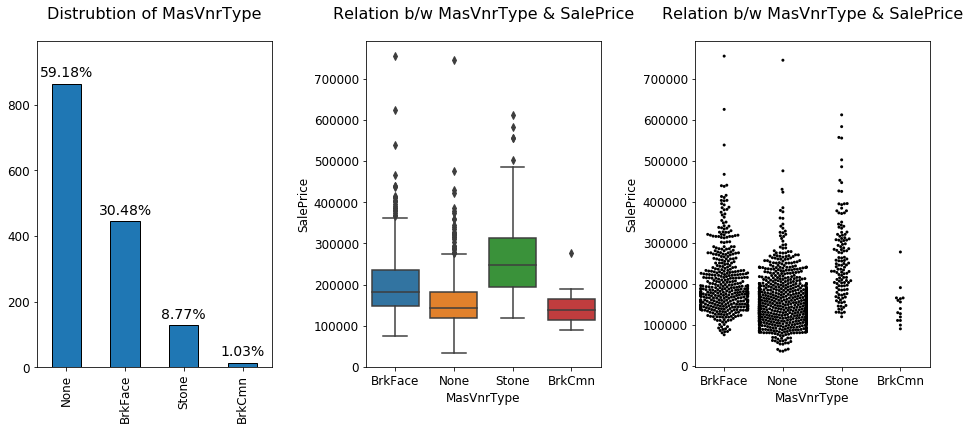

In [139]:
plot_cat_with_target('MasVnrType')

## MasVnrArea: Masonry veneer area in square feet

<Figure size 1152x432 with 0 Axes>

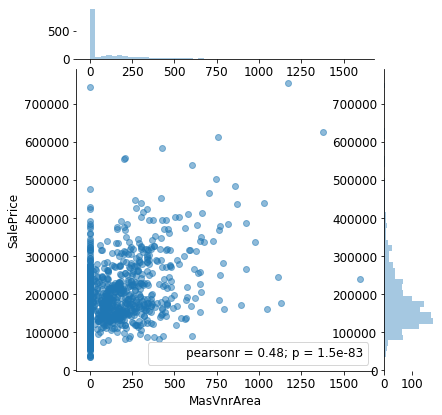

In [145]:
figsize(16, 6)

sns.jointplot(data=train, x='MasVnrArea', y='SalePrice', joint_kws={'alpha': .5})

## ExterQual: Evaluates the quality of the material on the exterior 

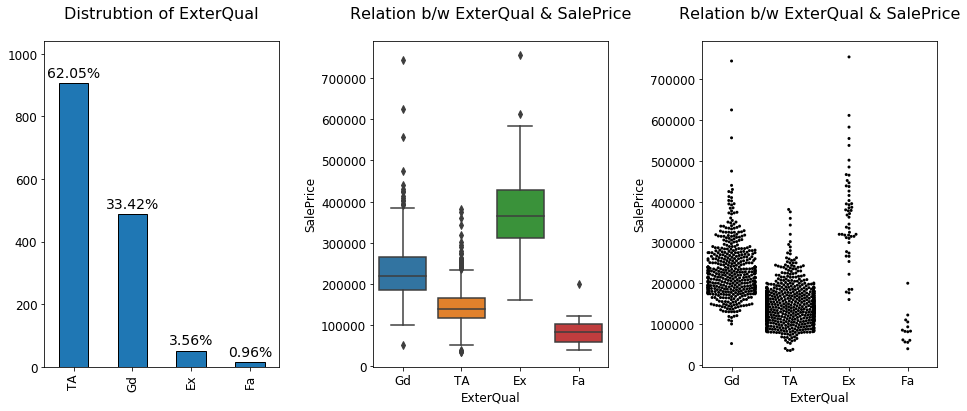

In [146]:
plot_cat_with_target('ExterQual');

**Observation:**<br>
This feature is very important, since it can distinguish between distinct values for the sale price.

## ExterCond: Evaluates the present condition of the material on the exterior

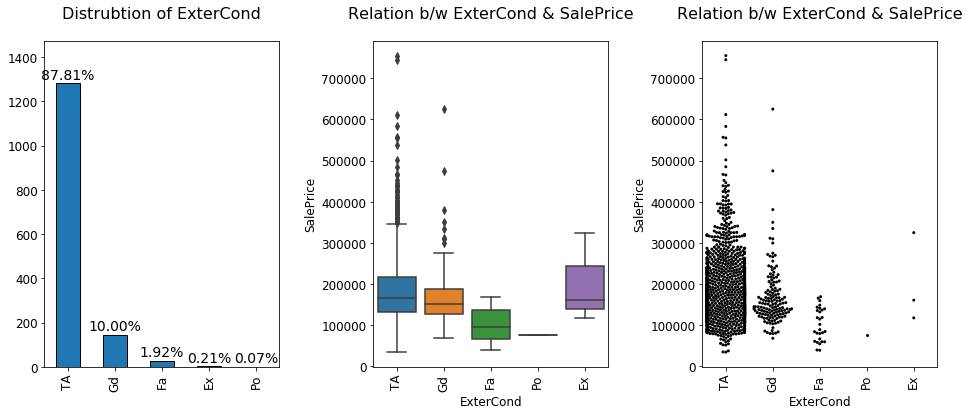

In [147]:
plot_cat_with_target('ExterCond', rotate=True)

## Foundation: Type of foundation

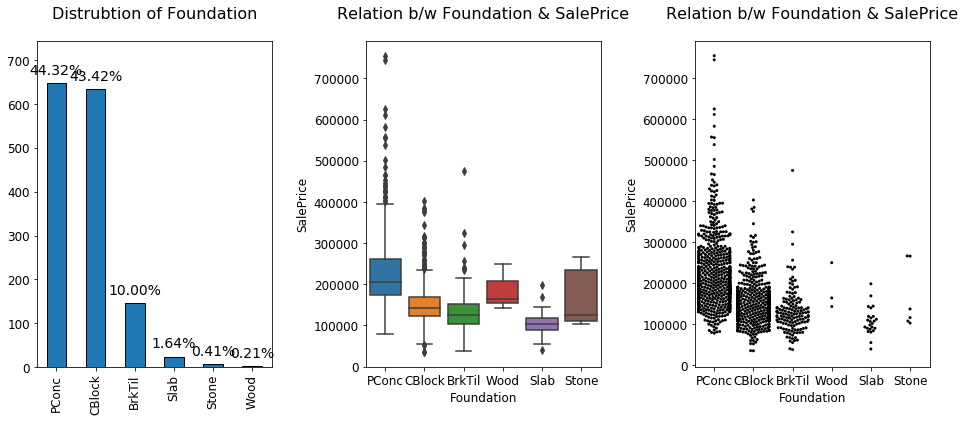

In [148]:
plot_cat_with_target('Foundation')

## BsmtQual: Evaluates the height of the basement

In [7]:
train.BsmtQual.fillna('NaN', inplace=True)

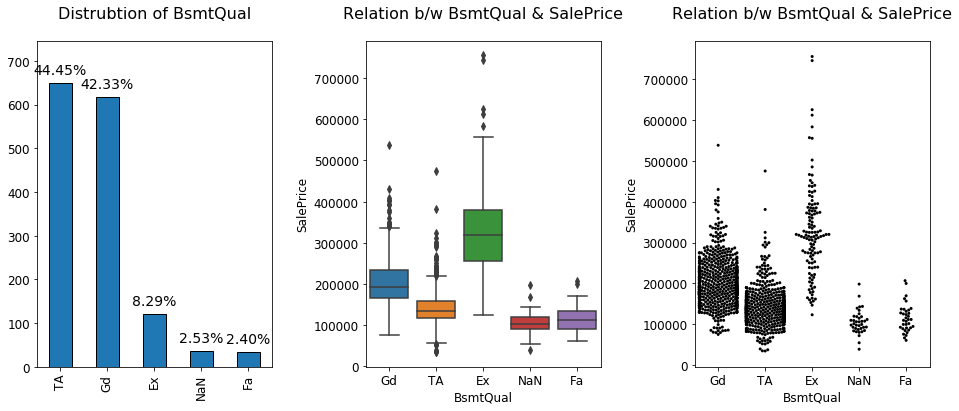

In [150]:
plot_cat_with_target('BsmtQual')

**Observation:**<br>
As we can see, as the quality of the basement increases, which cause the price of the house to increase.

## BsmtCond: Evaluates the general condition of the basement

In [8]:
train.BsmtCond.fillna('NaN', inplace=True)

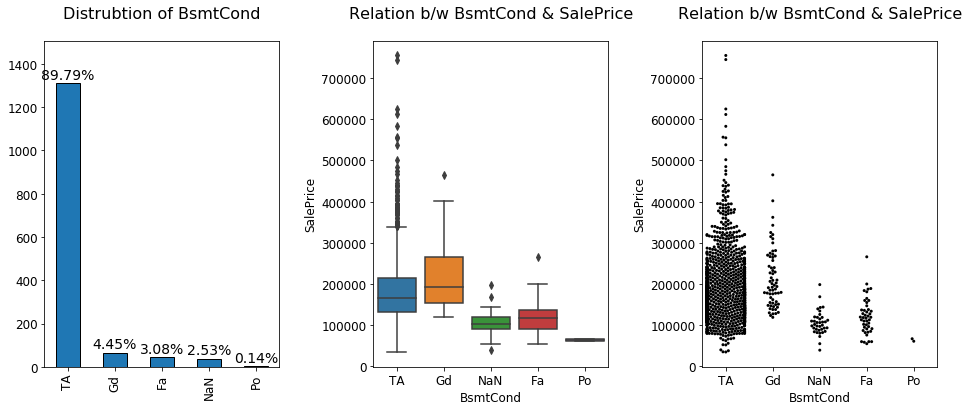

In [153]:
plot_cat_with_target('BsmtCond')

**Observation:**<br>
As we can see, as the condition of the basement increases, which cause the price of the house to increase, and vice versa.

## BsmtExposure: Refers to walkout or garden level walls

In [9]:
train.BsmtExposure.fillna('NaN', inplace=True)

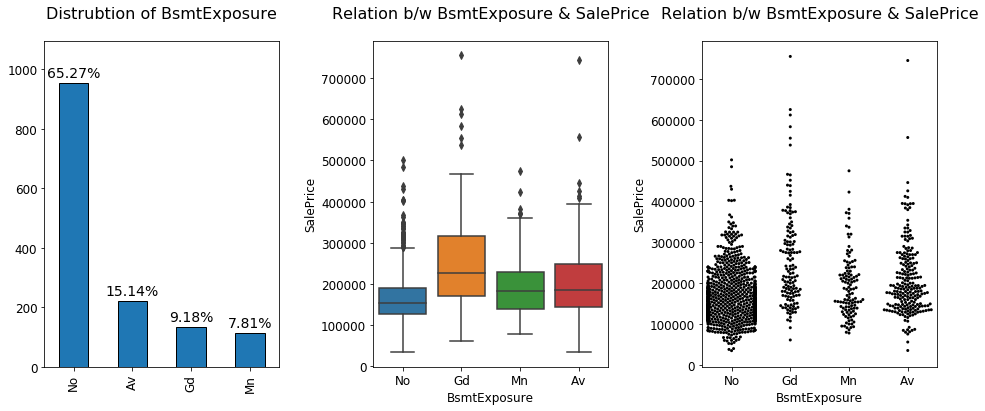

In [154]:
plot_cat_with_target('BsmtExposure')

## BsmtFinType1: Rating of basement finished area

In [10]:
train.BsmtFinType1.fillna('NaN', inplace=True)

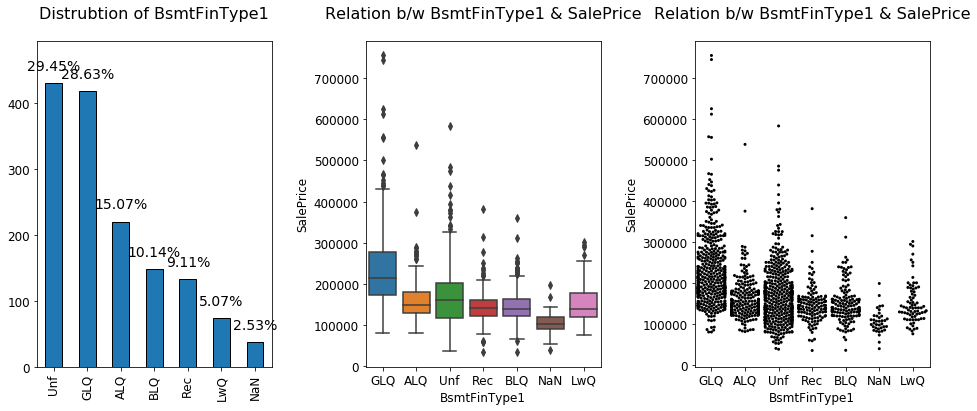

In [159]:
plot_cat_with_target('BsmtFinType1')

## BsmtFinSF1: Type 1 finished square feet

<Figure size 576x432 with 0 Axes>

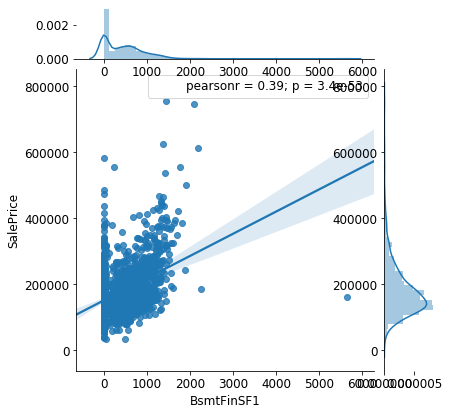

In [166]:
figsize()
sns.jointplot(data=train, x='BsmtFinSF1', y='SalePrice', kind='reg');

## BsmtFinType2: Rating of basement finished area (if multiple types)

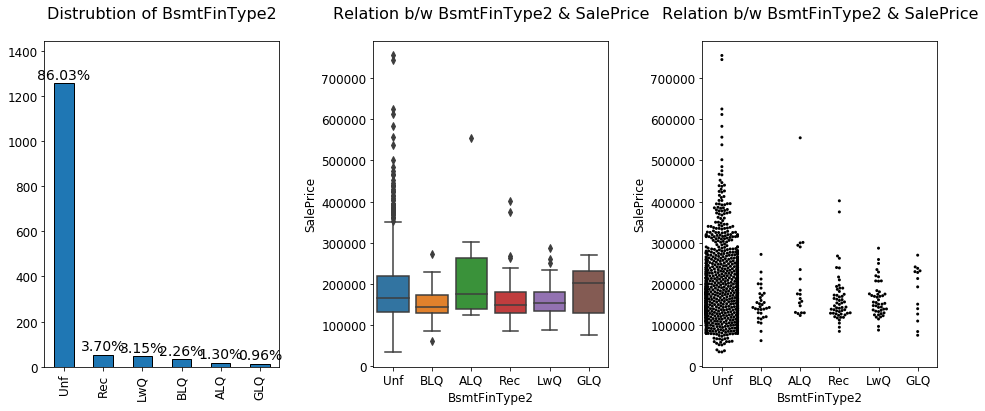

In [167]:
plot_cat_with_target('BsmtFinType2')

## BsmtFinSF2: Type 2 finished square feet

<Figure size 576x432 with 0 Axes>

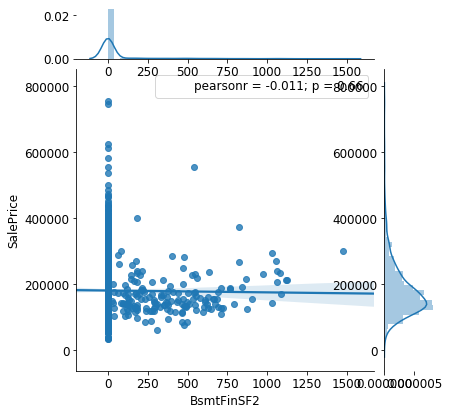

In [168]:
figsize()
sns.jointplot(data=train, x='BsmtFinSF2', y='SalePrice', kind='reg');

## BsmtUnfSF: Unfinished square feet of basement area

<Figure size 576x432 with 0 Axes>

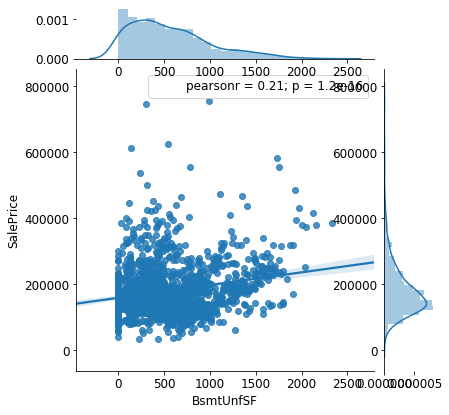

In [169]:
figsize()
sns.jointplot(data=train, x='BsmtUnfSF', y='SalePrice', kind='reg');

## TotalBsmtSF: Total square feet of basement area

<Figure size 576x432 with 0 Axes>

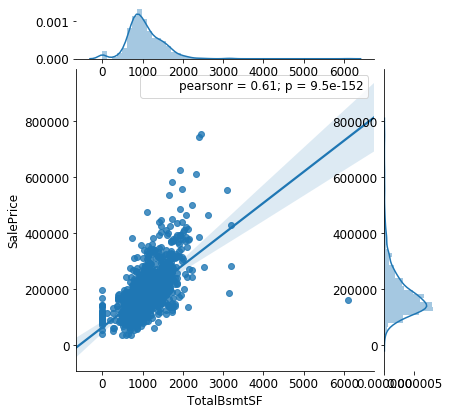

In [170]:
figsize()
sns.jointplot(data=train, x='TotalBsmtSF', y='SalePrice', kind='reg');

## Heating: Type of heating

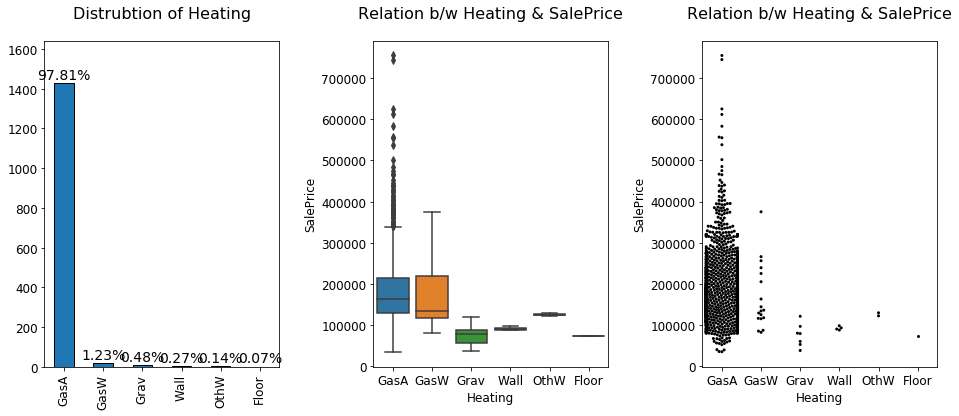

In [171]:
plot_cat_with_target('Heating')

## HeatingQC: Heating quality and condition

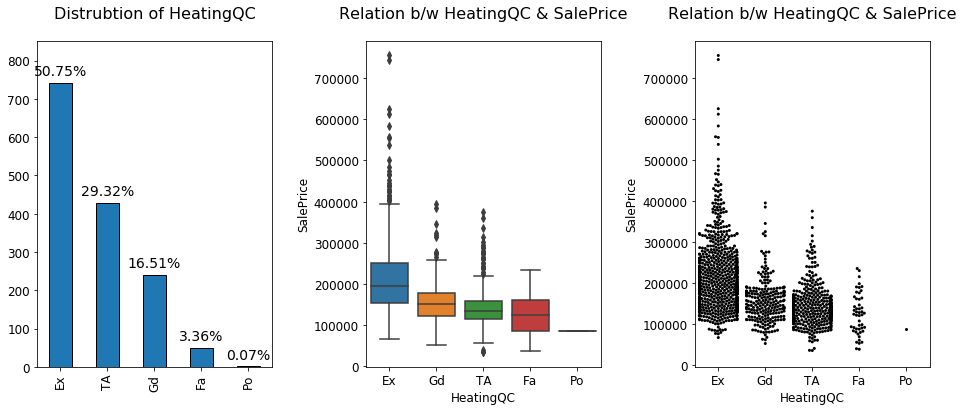

In [172]:
plot_cat_with_target('HeatingQC')

## CentralAir: Central air conditioning

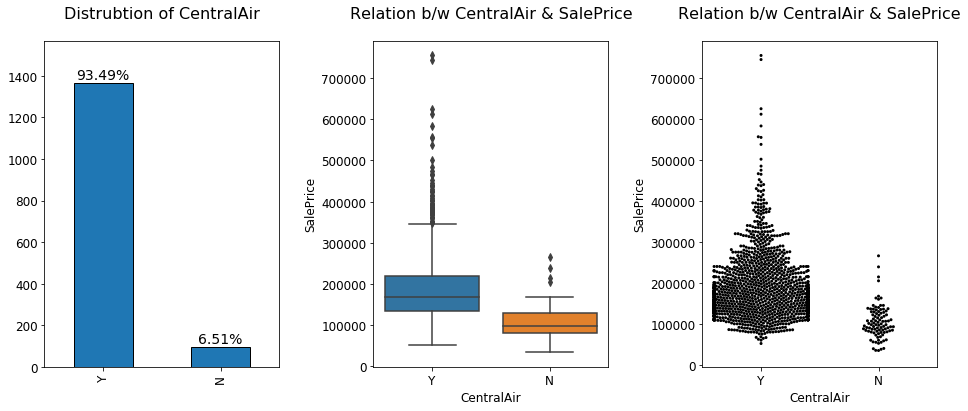

In [173]:
plot_cat_with_target('CentralAir')

**Observation:**<br>
As we can see this is important feature.

## Electrical: Electrical system

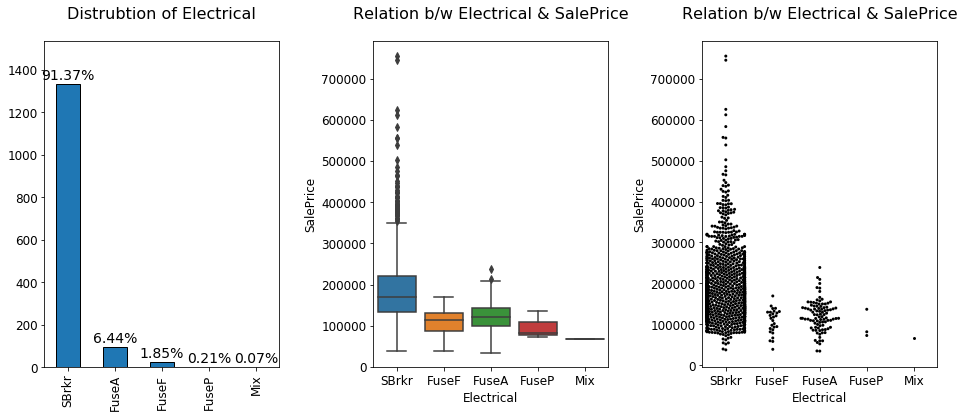

In [174]:
plot_cat_with_target('Electrical')

## 1stFlrSF: First Floor square feet
## 2ndFlrSF: Second floor square feet

<Figure size 576x432 with 0 Axes>

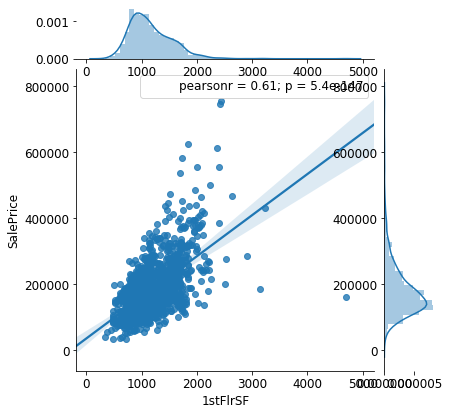

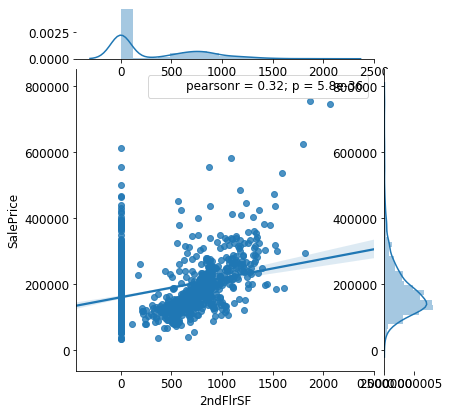

In [175]:
figsize()
sns.jointplot(data=train, x='1stFlrSF', y='SalePrice', kind='reg');

sns.jointplot(data=train, x='2ndFlrSF', y='SalePrice', kind='reg');

## LowQualFinSF: Low quality finished square feet (all floors)

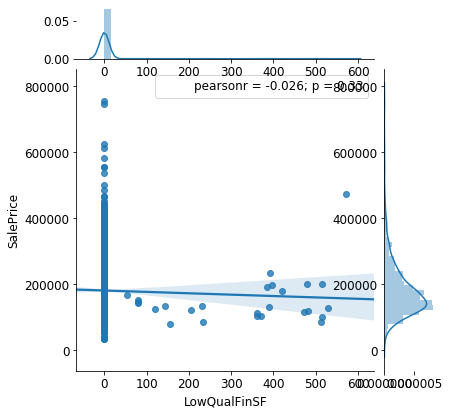

In [177]:
sns.jointplot(data=train, x='LowQualFinSF', y='SalePrice', kind='reg');

## BsmtFullBath: Basement full bathrooms

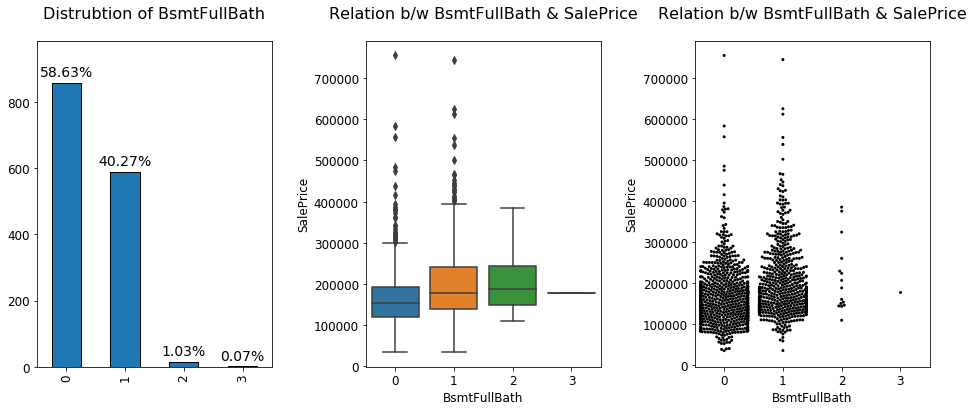

In [180]:
plot_cat_with_target('BsmtFullBath')

**Observation:**<br>
As the number of bathrooms increases, the price of the house increases as well.

## BsmtHalfBath: Basement half bathrooms

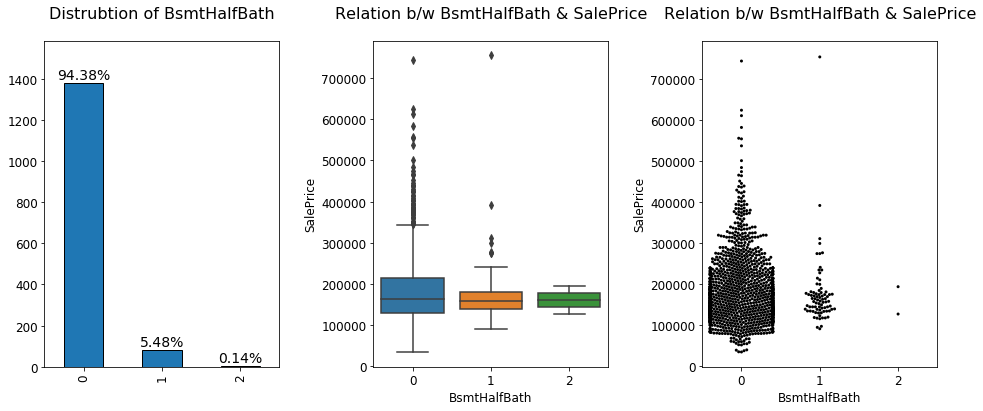

In [184]:
plot_cat_with_target('BsmtHalfBath')

## GrLivArea: Above grade (ground) living area square feet

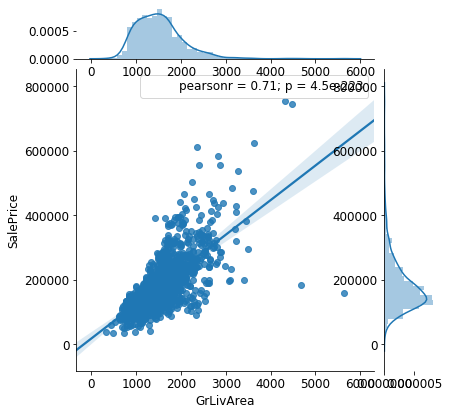

In [183]:
sns.jointplot(data=train, x='GrLivArea', y='SalePrice', kind='reg');

## FullBath: Full bathrooms above grade

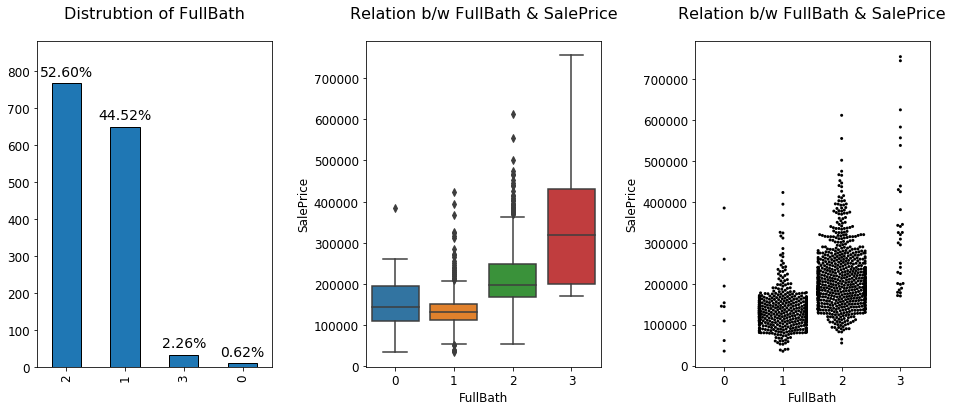

In [185]:
plot_cat_with_target('FullBath')

## HalfBath: Half baths above grade


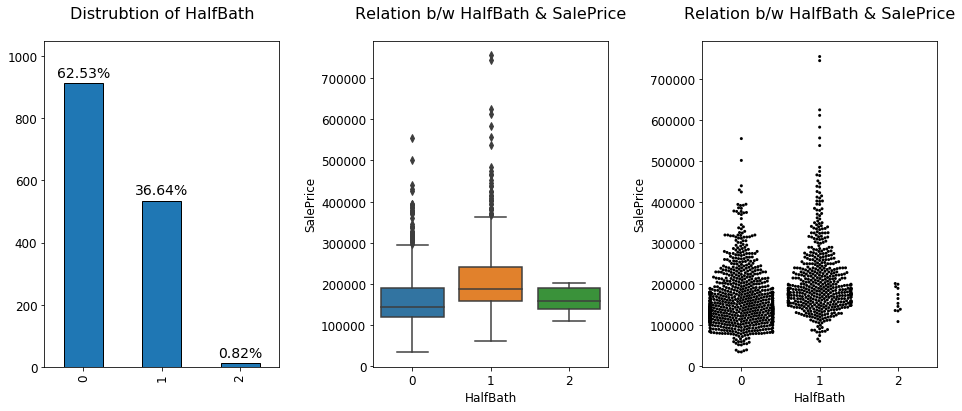

In [186]:
plot_cat_with_target('HalfBath')

## KitchenQual: Kitchen quality

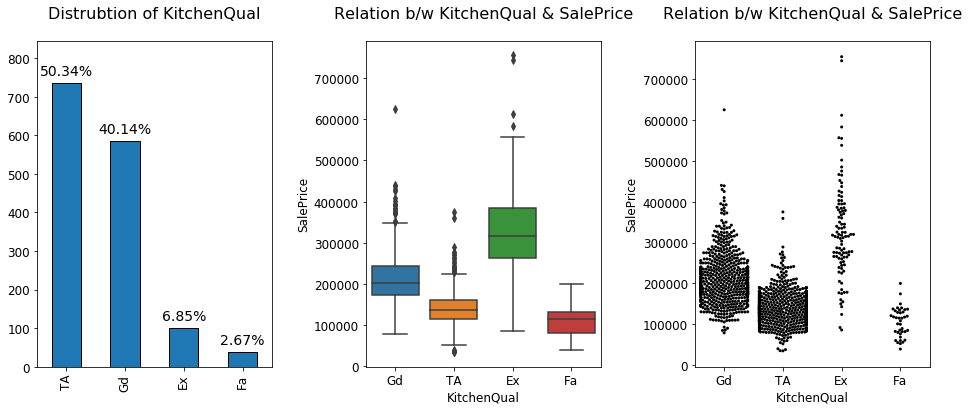

In [196]:
plot_cat_with_target('KitchenQual')

## TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

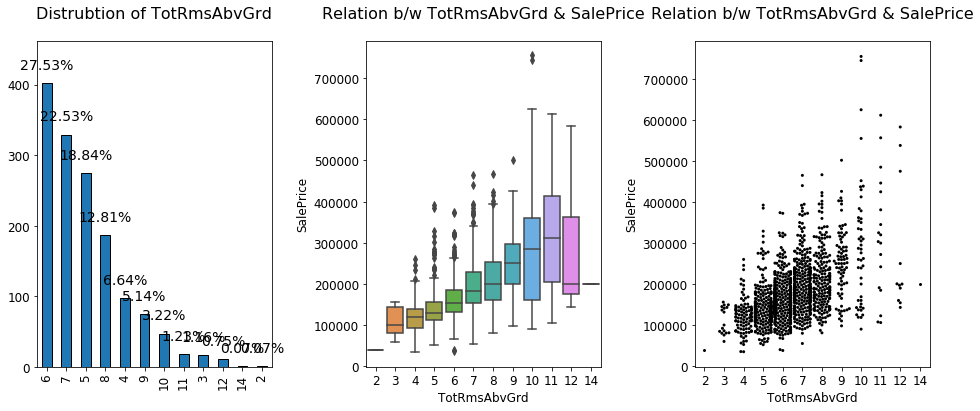

In [197]:
plot_cat_with_target('TotRmsAbvGrd')

## Functional: Home functionality (Assume typical unless deductions are warranted)

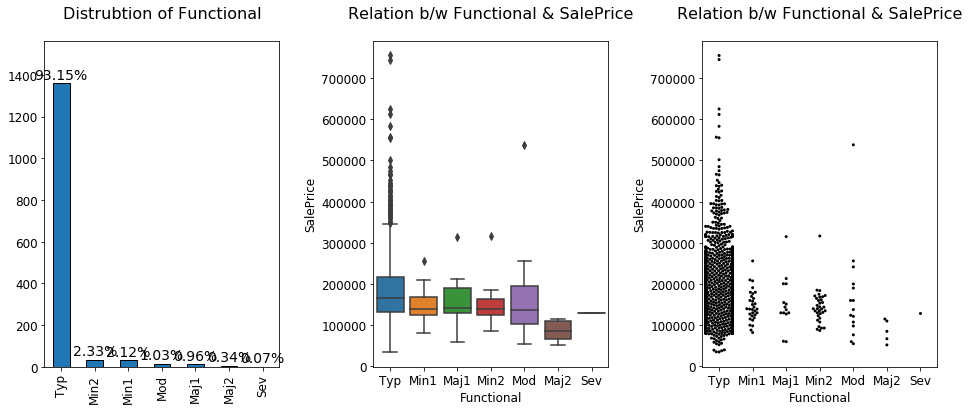

In [11]:
plot_cat_with_target('Functional')

## Fireplaces: Number of fireplaces

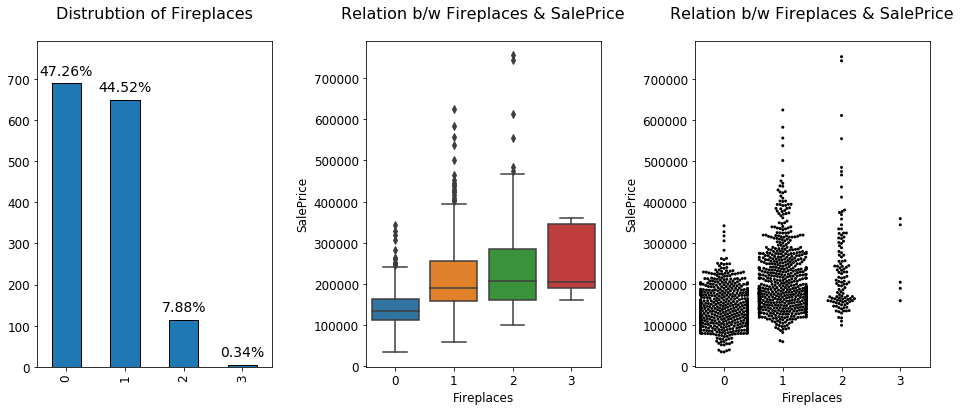

In [13]:
plot_cat_with_target('Fireplaces')

## FireplaceQu: Fireplace quality

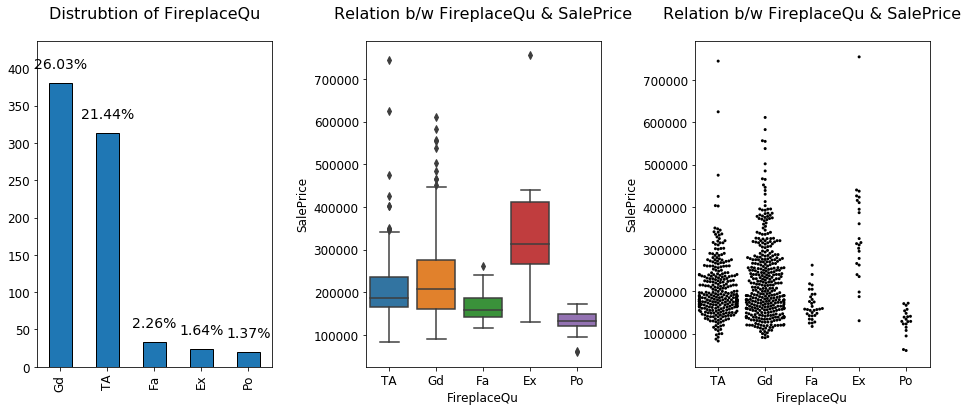

In [14]:
plot_cat_with_target('FireplaceQu')

## GarageType

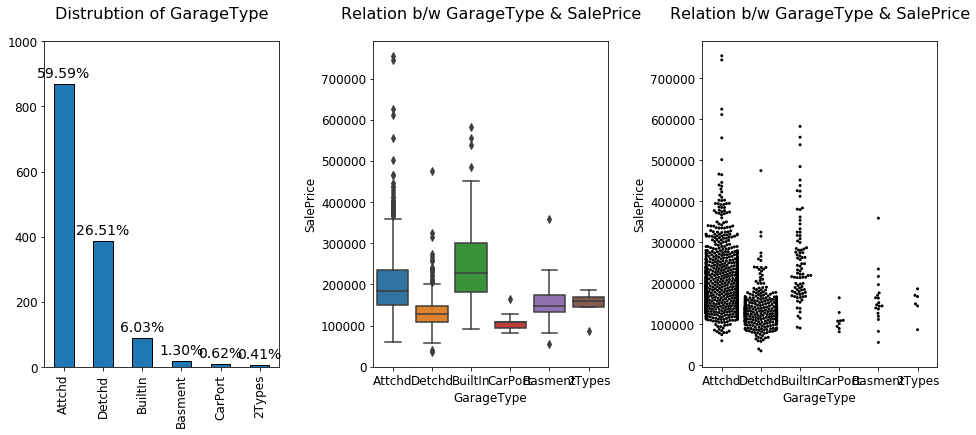

In [15]:
plot_cat_with_target('GarageType')

## GarageYrBlt: Year garage was built

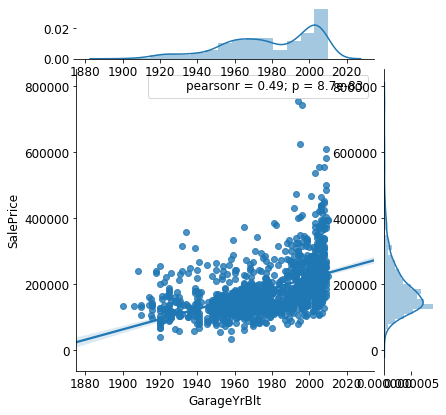

In [17]:
sns.jointplot(data=train, x='GarageYrBlt', y='SalePrice', kind='reg');

## GarageFinish: Interior finish of the garage

In [18]:
train.GarageFinish.fillna('NaN', inplace=True)

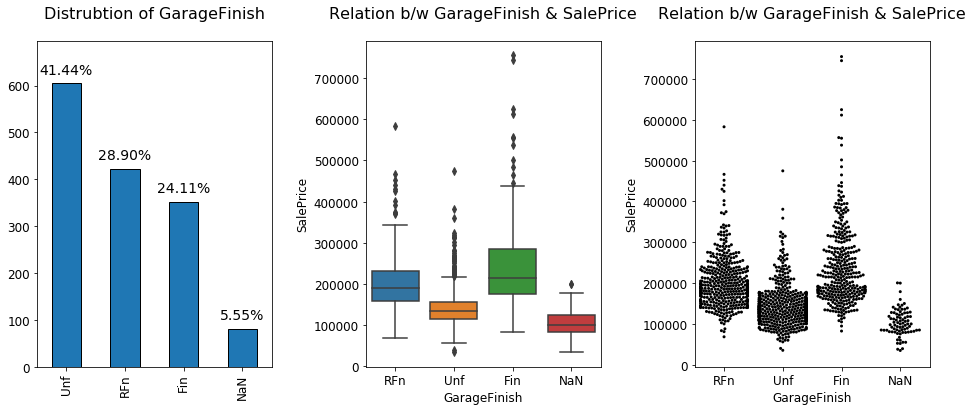

In [19]:
plot_cat_with_target('GarageFinish')

## GarageCars: Size of garage in car capacity

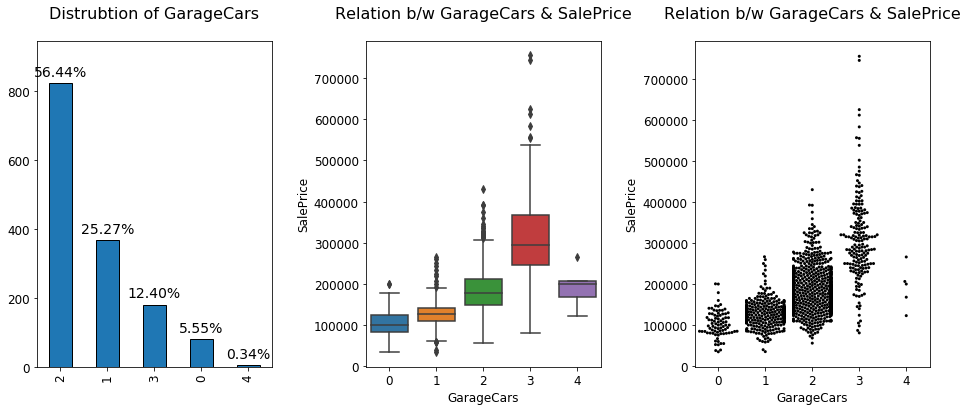

In [21]:
plot_cat_with_target('GarageCars')

## GarageArea: Size of garage in square feet

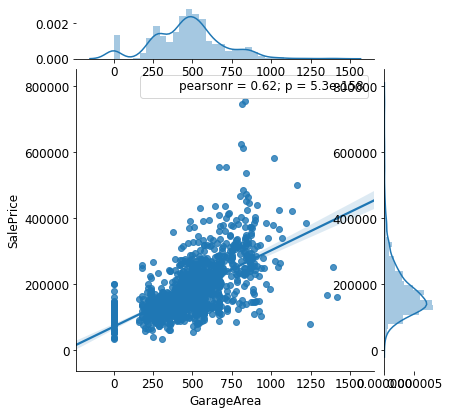

In [23]:
sns.jointplot(data=train, x='GarageArea', y='SalePrice', kind='reg')

## GarageQual: Garage quality

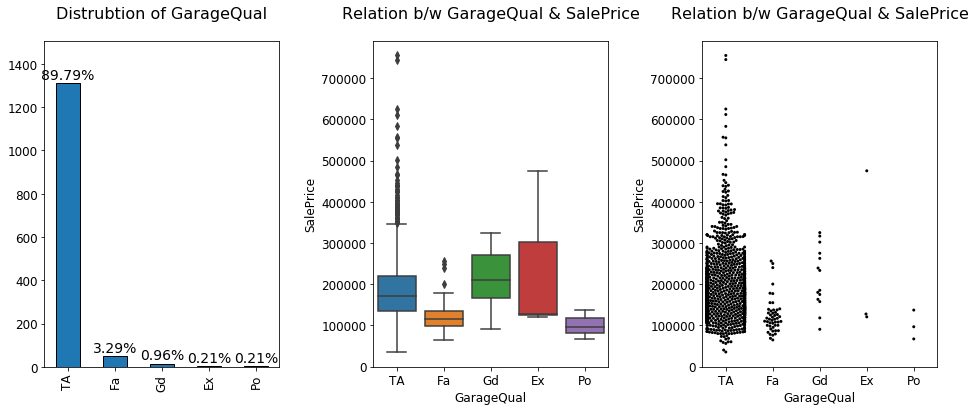

In [24]:
plot_cat_with_target('GarageQual')

## GarageCond: Garage condition

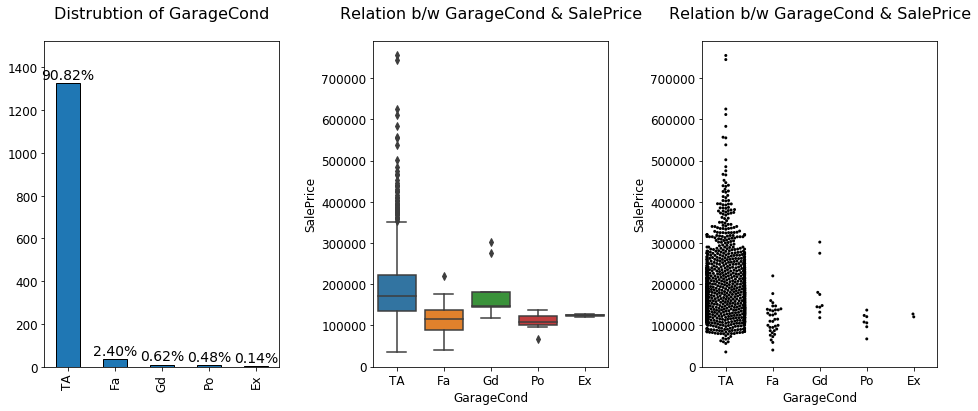

In [25]:
plot_cat_with_target('GarageCond')

## PavedDrive: Paved drivewa

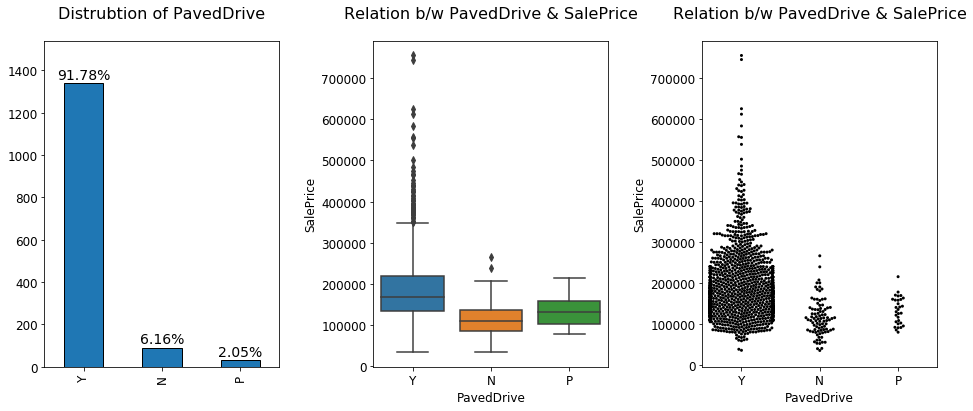

In [26]:
plot_cat_with_target('PavedDrive')

## WoodDeckSF: Wood deck area in square feet

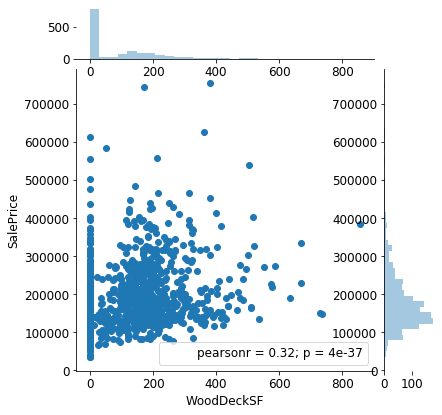

In [28]:
sns.jointplot('WoodDeckSF', 'SalePrice', train)

## OpenPorchSF: Open porch area in square feet


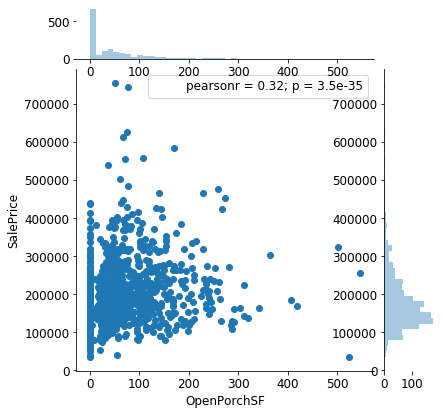

In [29]:
sns.jointplot('OpenPorchSF', 'SalePrice', train)

## EnclosedPorch: Enclosed porch area in square feet


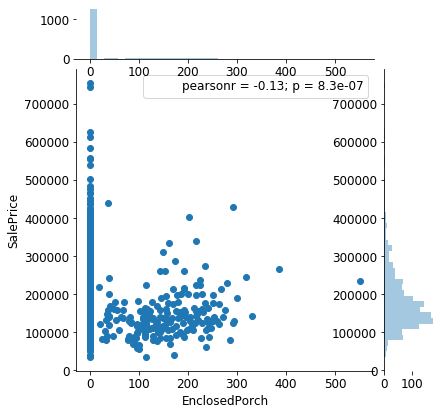

In [30]:
sns.jointplot('EnclosedPorch', 'SalePrice', train);

## 3SsnPorch: Three season porch area in square feet

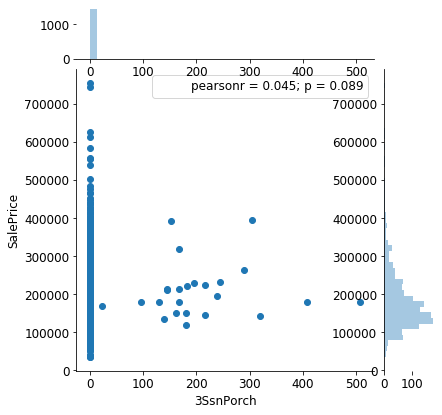

In [31]:
sns.jointplot('3SsnPorch', 'SalePrice', train);

## ScreenPorch: Screen porch area in square feet

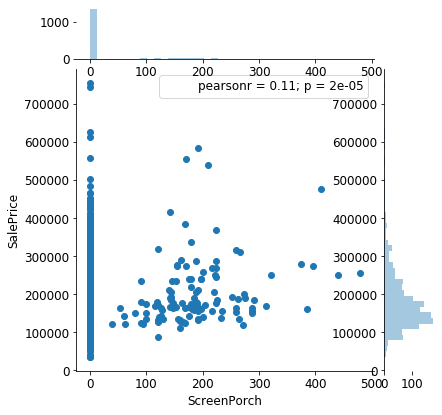

In [32]:
sns.jointplot('ScreenPorch', 'SalePrice', train);

## PoolArea: Pool area in square feet


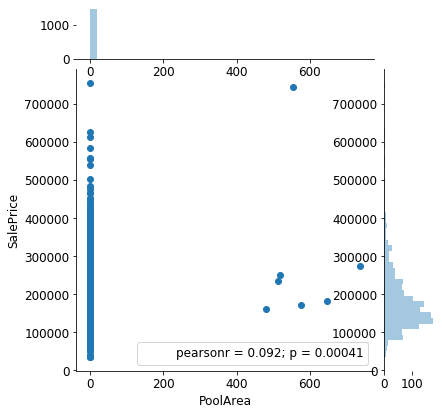

In [33]:
sns.jointplot('PoolArea', 'SalePrice', train);

## PoolQC: Pool quality


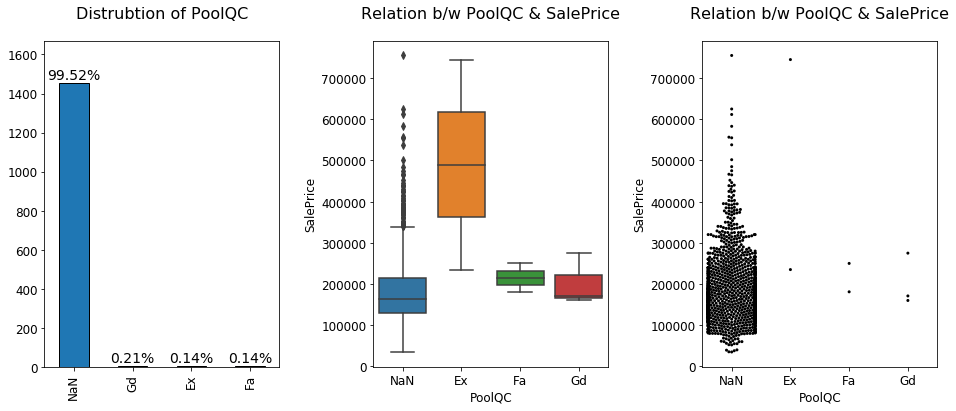

In [35]:
train.PoolQC.fillna('NaN', inplace=True)
plot_cat_with_target('PoolQC')

## Fence: Fence quality


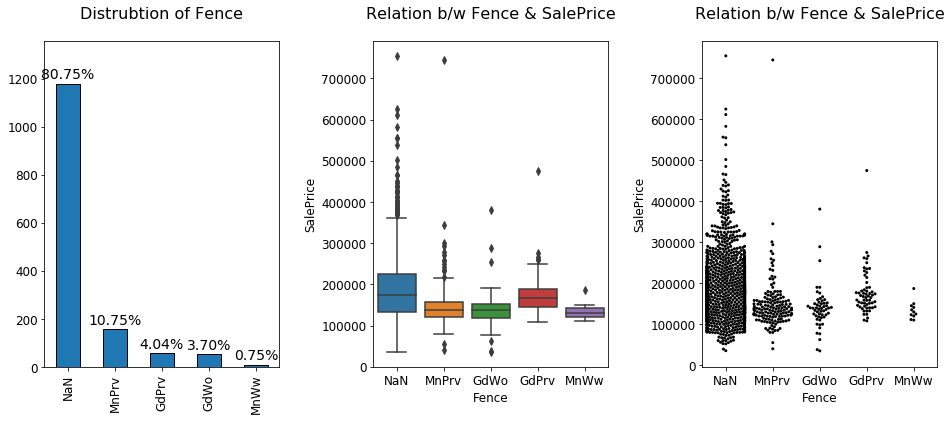

In [37]:
train.Fence.fillna('NaN', inplace=True)
plot_cat_with_target('Fence')

## MiscFeature: Miscellaneous feature not covered in other categories


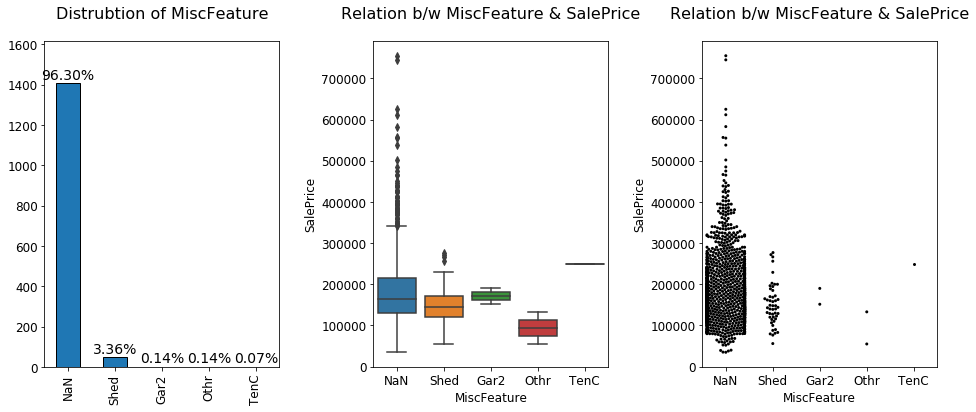

In [39]:
train.MiscFeature.fillna('NaN', inplace=True)
plot_cat_with_target('MiscFeature')

## MiscVal: $Value of miscellaneous feature

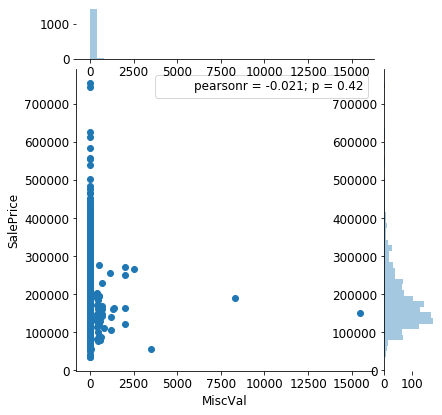

In [40]:
sns.jointplot('MiscVal', 'SalePrice', train);

## MoSold: Month Sold (MM)


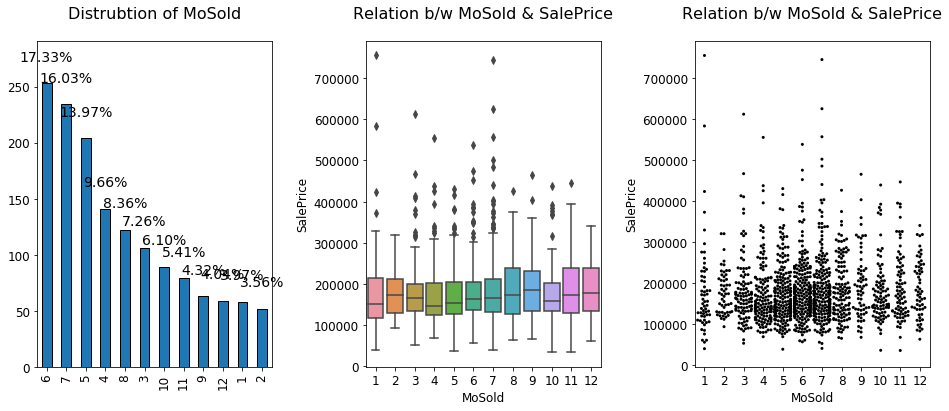

In [41]:
plot_cat_with_target('MoSold')

## YrSold: Year Sold (YYYY)


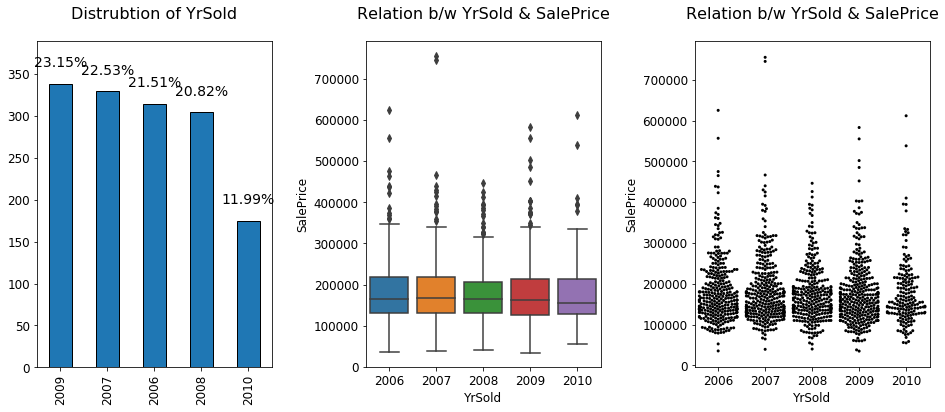

In [42]:
plot_cat_with_target('YrSold')

## SaleType: Type of sale


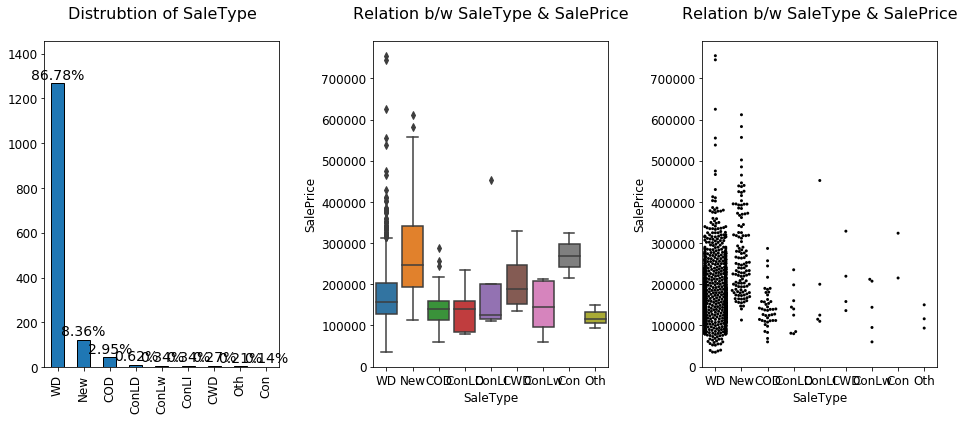

In [43]:
plot_cat_with_target('SaleType')

## SaleCondition: Condition of sale

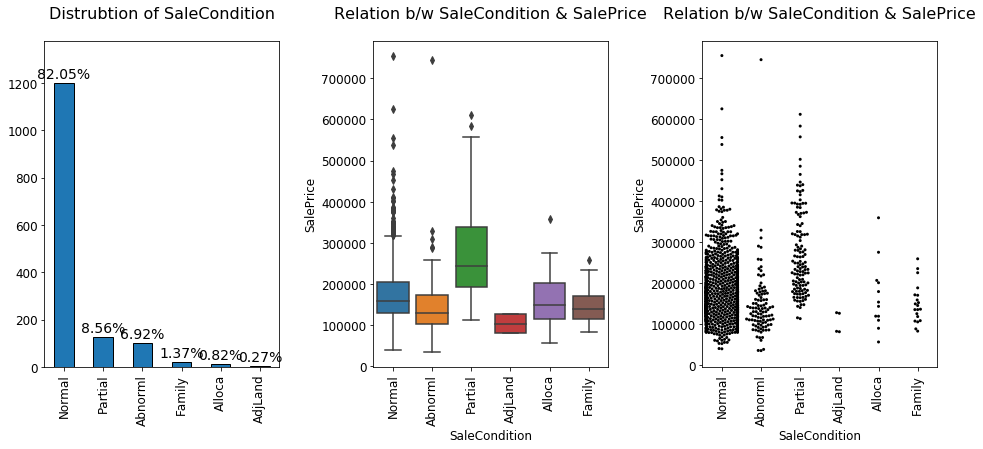

In [45]:
plot_cat_with_target('SaleCondition', rotate=True)

**Over All Observation:**<br>
- There are some features that have dominant values, and the rest of the values are minorities.
- The quality of things matters in terms of price.

In [19]:
ord_cols  = ['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'HeatingQC', 'Electrical', 
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
             'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
             'PoolQC', 'Fence']
cat_cols  = ['MSSubClass', 'MSZoning', 'Alley', 'Street', 'LotShape', 'LandContour', 'LotConfig', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols  = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
to_drop   = ['Utilities', 'Street', 'PoolArea', 'MiscVal']
bin_cols  = ['CentralAir']